# Reducing the number of high fatality accidents

### Context
The road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

#### Problem Statement/Motivation for Analysis

Roads are essential to our daily lives. We use them in some way - driving, riding, walking, or travelling as a passenger - and we depend on them to obtain goods and services. 
<br>
Unfortunately, every day people get injured and killed as a result of road accidents. In 2020, 1,516 people were killed on UK roads, with 1,460 deaths recorded in Britain and 56 in Northern Ireland - a daily average of 5 deaths a day [1]. Road deaths and injuries are however not inevitable The last few decades have demonstrated that effective and comprehensive road safety strategies can reduce the frequency of road accidents and the number of people killed and injured, despite increasing traffic levels [2].
<br>
In order to develop these effective and comprehensive road safety strategies, it is important to study and understand the characteristics of these accidents. In this report, road accidents in the UK for the year 2020 were analyzed, and effective reduction strategies have been documented and explained.

In this report, accidents that were recorded as fatal and had at least three casualties would be classified as Major Incidents
<br>
Every other accident reported in this dataset would be classified as Other Incidents
<br>
Core areas of analysis in this report:
 - Time of the day and day of the week most major incidents happen
 - Patterns in the time of day and day of the week when major incidents occur
 - Characteristics that stand out in major incidents when compared with other incidents
 - Areas more susceptible to major incidents based on the road accident data for 2020 in the UK
 - Areas of focus when brainstorming to reduce major incidents

Installing and/or importing python libraries that would be used in this analysis

In [1]:
#!pip install plotly
#!pip install cufflinks
#!pip install chart_studio
#!pip install geopy
#!pip install geopandas
#!pip install termcolor
from urllib.request import urlopen
import json
#import geopandas as gpd
from termcolor import colored
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
accidents = pd.read_csv(r'./data/accident-data.csv')
import warnings
warnings.filterwarnings("ignore")
accidents.head()
pd.set_option("display.max_columns", 100)

In [2]:
# checking the first five rows of the data to get a quick view of it
accidents.head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  2020010219808           2020           10219808  -0.254001  51.462262   
1  2020010220496           2020           10220496  -0.139253  51.470327   
2  2020010228005           2020           10228005  -0.178719  51.529614   
3  2020010228006           2020           10228006  -0.001683  51.541210   
4  2020010228011           2020           10228011  -0.137592  51.515704   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  04/02/2020   
1                  3                   1                     2  27/04/2020   
2                  3                   1                     1  01/01/2020   
3                  2                   1                     1  01/01/2020   
4                  3                   1                     2  01/01/2020   

   day_of_week   time  first_road_class  first_road_number  road_type  \
0            3  09:00                 6                  0          6   
1            2  13:55                 3               3036          6   
2            4  01:25                 5                  0          6   
3            4  01:50                 3                 11          6   
4            4  02:25                 3                 40          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  6   
1           20                9                 2                  6   
2           30                3                 1                  6   
3           30                0                -1                  6   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                   0                                  9   
1                   0                                  0   
2                   0                                  0   
3                   0                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  
0                    0                    1  
1                    0                    1  
2                    0                    1  
3                    0                    1  
4                    0                    1

From the first five rows of this dataset, it can be seen that most of the columns are categorical; these categorical columns are encoded using numbers. Next, the lookup table would be inspected.

In [3]:
# reading in the lookup table to explains the values contained in each column of the accidents data. Also checking the first five rows
# of the data
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head(5)

table          field name code/format label  \
0  Accident      accident_index         NaN   NaN   
1  Accident       accident_year         NaN   NaN   
2  Accident  accident_reference         NaN   NaN   
3  Accident           longitude         NaN   NaN   
4  Accident            Latitude         NaN   NaN   

                                                note  
0  unique value for each accident. The accident_i...  
1                                                NaN  
2  In year id used by the police to reference a c...  
3                                  Null if not known  
4                                  Null if not known

From the lookup table, the value of each number encoding in the accident dataset can be decoded. This would be used later in this report to improve the quality of insights that can be agained from analyzing the accident dataset.

In [4]:
# a quick look at the descriptive statistics for this dataset
accidents.describe()

accident_year     longitude      latitude  accident_severity  \
count        91199.0  91185.000000  91185.000000       91199.000000   
mean          2020.0     -1.189258     52.351073           2.768232   
std              0.0      1.367786      1.327573           0.456682   
min           2020.0     -7.497375     49.970479           1.000000   
25%           2020.0     -2.107789     51.457237           3.000000   
50%           2020.0     -1.046912     51.763385           3.000000   
75%           2020.0     -0.125238     53.297386           3.000000   
max           2020.0      1.756257     60.541144           3.000000   

       number_of_vehicles  number_of_casualties   day_of_week  \
count        91199.000000          91199.000000  91199.000000   
mean             1.835272              1.267382      4.121558   
std              0.677272              0.681473      1.932200   
min              1.000000              1.000000      1.000000   
25%              1.000000              1.000000      2.000000   
50%              2.000000              1.000000      4.000000   
75%              2.000000              1.000000      6.000000   
max             13.000000             41.000000      7.000000   

       first_road_class  first_road_number     road_type   speed_limit  \
count      91199.000000       91199.000000  91199.000000  91199.000000   
mean           4.220320         790.666071      5.256001     36.270113   
std            1.443475        1580.817743      1.684878     13.896032   
min            1.000000           0.000000      1.000000     -1.000000   
25%            3.000000           0.000000      6.000000     30.000000   
50%            4.000000          34.000000      6.000000     30.000000   
75%            6.000000         538.000000      6.000000     40.000000   
max            6.000000        9174.000000      9.000000     70.000000   

       junction_detail  junction_control  second_road_class  \
count     91199.000000      91199.000000       91199.000000   
mean          3.934879          1.737497           5.551771   
std          12.612777          2.510125           1.015113   
min          -1.000000         -1.000000           1.000000   
25%           0.000000         -1.000000           6.000000   
50%           2.000000          2.000000           6.000000   
75%           3.000000          4.000000           6.000000   
max          99.000000          9.000000           6.000000   

       second_road_number  pedestrian_crossing_human_control  \
count        91199.000000                       91199.000000   
mean           220.231987                           0.352975   
std            913.692832                           1.698116   
min             -1.000000                          -1.000000   
25%              0.000000                           0.000000   
50%              0.000000                           0.000000   
75%              0.000000                           0.000000   
max           9174.000000                           9.000000   

       pedestrian_crossing_physical_facilities  light_conditions  \
count                             91199.000000      91199.000000   
mean                                  1.185309          2.065308   
std                                   2.445924          1.747690   
min                                  -1.000000         -1.000000   
25%                                   0.000000          1.000000   
50%                                   0.000000          1.000000   
75%                                   0.000000          4.000000   
max                                   9.000000          7.000000   

       weather_conditions  road_surface_conditions  \
count        91199.000000             91199.000000   
mean             1.702047                 1.391583   
std              1.845786                 0.925690   
min             -1.000000                -1.000000   
25%              1.000000                 1.000000   
50%              1.000000       

Although most of the columns are categorical and their meaning cannot be obtained from a descriptive statistics of the data, the descriptive statistics does however show the count of records in each column, the min and max number encoding used in each categorical column. 
<br>
In addition, some of the columns like the number of vehicles and the number of casualties in each recorded accident are numerical/non-categorical. 
<br>
From this dataset, a maximum of 13 vehicles were recorded to have been involved in a road accident in the United Kingdom in the year 2020 and the recorded minimum was 1 vehicle. 
<br>
The maximum number of recorded casualties in an accident was 41 and the minimum was 1.

In [5]:
# checking to see the accident that had the highest number of casualties. This accident wasn't a major incident. however, having an 
# accident severity of 2 means it was a serious one. 
accidents[accidents.number_of_casualties==41]

accident_index  accident_year accident_reference  longitude   latitude  \
66993  2020440349165           2020          440349165  -1.314431  51.085841   

       accident_severity  number_of_vehicles  number_of_casualties  \
66993                  2                   1                    41   

             date  day_of_week   time  first_road_class  first_road_number  \
66993  10/09/2020            5  08:10                 6                  0   

       road_type  speed_limit  junction_detail  junction_control  \
66993          6           30                0                -1   

       second_road_class  second_road_number  \
66993                  6                   0   

       pedestrian_crossing_human_control  \
66993                                  0   

       pedestrian_crossing_physical_facilities  light_conditions  \
66993                                        0                 1   

       weather_conditions  road_surface_conditions  \
66993                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  
66993                           0                    0                    2

In [6]:
accidents.shape

(91199, 27)

This dataset contains a record of 91,199 accidents with 27 variables describing each accident

In [7]:
lookup.shape

(129, 5)

#### Data Preparation

Preparation and segmentation of the data that would be used for analysis

In [8]:
# dropping ID columns and constant columns
accidents.drop(["accident_index", "accident_year","accident_reference"], axis=1, inplace=True)

In [9]:
# selecting the part of the data that contains major incidents based on the definition of major incidents as fatal incidents that 
# have casualties greater than or equal to three ie 3+
major_incidents = accidents[(accidents.accident_severity==1) & (accidents.number_of_casualties>=3)]
major_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 3102 to 90931
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   longitude                                202 non-null    float64
 1   latitude                                 202 non-null    float64
 2   accident_severity                        202 non-null    int64  
 3   number_of_vehicles                       202 non-null    int64  
 4   number_of_casualties                     202 non-null    int64  
 5   date                                     202 non-null    object 
 6   day_of_week                              202 non-null    int64  
 7   time                                     202 non-null    object 
 8   first_road_class                         202 non-null    int64  
 9   first_road_number                        202 non-null    int64  
 10  road_type                                202 

All entries in the major incidents dataset are valid. There are no missing values.

In [10]:
# putting together incidents that are not major incidents, to use later for comparison purposes in this report
other_incidents = accidents[(accidents.accident_severity!=1) & (accidents.number_of_casualties<3)]
other_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85193 entries, 0 to 91198
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   longitude                                85179 non-null  float64
 1   latitude                                 85179 non-null  float64
 2   accident_severity                        85193 non-null  int64  
 3   number_of_vehicles                       85193 non-null  int64  
 4   number_of_casualties                     85193 non-null  int64  
 5   date                                     85193 non-null  object 
 6   day_of_week                              85193 non-null  int64  
 7   time                                     85193 non-null  object 
 8   first_road_class                         85193 non-null  int64  
 9   first_road_number                        85193 non-null  int64  
 10  road_type                                85193

Only the longitude and latitude columns in the other incidents dataset contain null entries. The location of accidents cannot be inferred from the values in this dataset; if the longitude and latitude of other incidents are needed for analysis in this report, the rows containing these null values would be dropped.

In [11]:
# resetting the index of both major and other incidents to begin from 0
major_incidents.reset_index(drop=True, inplace = True)
other_incidents.reset_index(drop=True, inplace = True)

Creating functions to use for getting the important components of the data needed for this analysis

In [12]:
def collect_hour(time):
    """
    function to collect the hour part of the time
    """
    hour = int(time[:time.find(':')])
    return hour

In [13]:
# This function would be applied only for major incidents as it is time-consuming and major incidents are a lot less than other 
# incidents
def get_the_county(coordinates):
    """"
    function takes in the latitude and longtiude coordinates of a location and outputs either the county, city or town associated
    with the coordinates, depending on what's available on maps for the given coordinate.
    """
    locate = Nominatim(user_agent = "bing").reverse(coordinates)
    location = locate.raw["address"]
    if "county" in location.keys():
        return location['county']
    elif "city" in location.keys():
        return location["city"]
    else:
        return location["town"]

In [14]:
def create_timeofDay(df):
    """
    function to convert time segments(hours) from numerical representation of time to segments of the day they fall into
    E.g 6am to 11:59am represents Morning
        12pm to 4:59pm represents Afternoon
        5pm to 8:59pm represents Evening
        9pm to 5:59am represents Night 
    """
    n = len(df)
    df["time_of_day"] = pd.Series()
    for i in range(n):
        if df["hour"].iloc[i] in range(6, 12):
            df["time_of_day"].iloc[i] = "Morning"
        elif df["hour"].iloc[i] in range(12,17):
            df["time_of_day"].iloc[i] = "Afternoon"
        elif df["hour"].iloc[i] in range(17, 21):
            df["time_of_day"].iloc[i] = "Evening"
        else:
            df["time_of_day"].iloc[i] = "Night"
    df.drop("hour", inplace=True, axis=1)
       
            

##### Some column values need to be renamed for easier understanding by target audience of the report
Most of the columns in the dataset are categorical columns, with different categories represented by numbers. As the analyst, it may be a little easier to find the meaning of these categories; but to help the target audience better understand various visualizations, these categories would be renamed/mapped to what they actually represent

For this dataset, these columns are:
1. day of week
2. first road class
3. road type
4. junction detail
5. junction control
6. second road class
7. pedestrian crossing human control
8. pedestrian crossing physical facilities
9. light conditions
10. weather conditions
11. road surface conditions
12. special conditions at site
13. carriageway hazards
14. urban or rural area

In [15]:
def map_column_values(column, lookup, df):
    """
    This function maps number encodings of column values into the categories they represent
    for eg in the "day_of_week" column, 1 represents Sunday. This function uses the lookup dataframe to replace the value of 1
    in the "day_of_week" column with Sunday.
    """
    lookup_dict = lookup[lookup["field name"] == column][["code/format", "label"]].set_index("code/format")["label"].to_dict()
    transformed = df[column].map(str).replace(lookup_dict)
    return transformed

In [16]:
# from inspecting the dataset of accidents and the lookup table, these are the columns that need their values replaced.
columns_to_transform = ['day_of_week', 'first_road_class', 'road_type', 'second_road_class','junction_detail', 'junction_control',
                        'pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities', 'light_conditions',
                        'weather_conditions', 'road_surface_conditions','special_conditions_at_site', 'carriageway_hazards',
                        'urban_or_rural_area']       

In [17]:
# appling the hour function to obtain the hour of the day from the time - time in the dataset is formatted as HH:MM
# creating a coordinate column in the major incidents dataframe and applying the get_the_county function on the coordinates to get the
# county, city or town where the major incident occurred.
# also dropping the coordinates column after completing the mapping
# mapping hours to the time segment of the day they represent as defined by the create_timeOfDay function
major_incidents["hour"] = major_incidents.time.apply(collect_hour)
major_incidents["coordinates"] =major_incidents.latitude.map(str) +","+ major_incidents.longitude.map(str)
major_incidents["county"] = major_incidents["coordinates"].apply(get_the_county)
major_incidents.drop(["coordinates", "accident_severity", "date", "time"], axis=1, inplace = True)
create_timeofDay(major_incidents)

In [18]:
# appling the hour function to obtain the hour of the day from the timme - time in the dataset is formatted as HH:MM
# dropping columns that would not be used for analysis.
# The accident severity column would not be used because both categories serious and minor have been grouped as other incidents,
# the date column would not be used because the day of the week has already been obtained fron the date. 
# The time column would not be used because the hour and time of the day (morning, afternoon or evening) has already 
# been extracted from the column. 
# The latitude and longitude columns would not be used because they contain missing values, are time consuming to map into counties, 
# and the major focus of this report is on reducing major incidents and not other incidents.
other_incidents["hour"] = other_incidents.time.apply(collect_hour)
other_incidents.drop(["accident_severity", "date", "time", "longitude", "latitude"], axis=1, inplace = True)
create_timeofDay(other_incidents)

In [19]:
#  changing the values of the columns in each dataset to the categories they represent.
for i in columns_to_transform:
    major_incidents[i] = map_column_values(i, lookup, major_incidents)
for i in columns_to_transform:
    other_incidents[i] = map_column_values(i, lookup, other_incidents)

### Visualization and Analysis of Major Incidents

In [20]:
# Setting the size of the figures that would be plotted
plt.rcParams["figure.figsize"] = (15, 6)

Most of the visualizations that would be used in this analysis would be countplots. This is because the focus of this analysis is on understanding the characteristics of major incidents so that the number of major incidents can be reduced. A count plot gives the number of occurrence (of major/other incidents) for each category. Knowing how a characteristic affects the number of major incidents can provide insights on how to reduce that number by purposefully taking steps that affect that characteristic/category. Hence, a countplot is most appropriate for majority of the analysis that would be done in this report.

#### Major Incidents by Day of the Week and Time of the Day

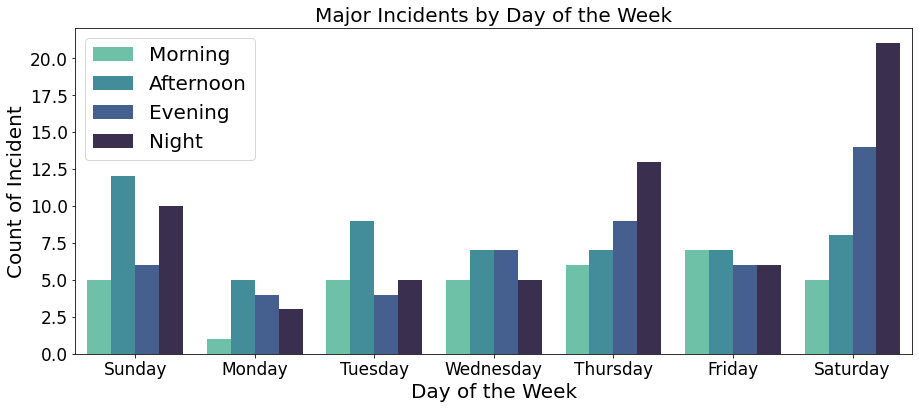

In [21]:
# generating a count plot of major incidents by day of the week hued by the time of the day they occurred
xticks = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.countplot(major_incidents.day_of_week, hue = major_incidents.time_of_day, order = xticks,
              hue_order = ["Morning", "Afternoon", "Evening", "Night"],palette="mako_r" )
plt.title('Major Incidents by Day of the Week', fontsize = 20)
plt.xlabel('Day of the Week', fontsize=20)
plt.ylabel("Count of Incident", fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

The countplot above shows the highest number of major incidents by day of the week and time of the day in the UK in 2020 = 20
<br>
The countplot also shows that <b>most major incidents </b> - that were reported - in the UK in 2020 happended on:
<br>
 - Saturday - EVENING AND NIGHT
 - Sunday - AFTERNOON AND NIGHT
 - Thursay - EVENING AND NIGHT
 - Tuesday afternoon also showed a spike in the number of major incidents

<br>
Monday had the least number of major incidents - for all times of the day - among other days of the week

#### Distinguishing Major Incidents by other factors/Characteristics

#### Major Incidents by Day of the week, time of the day, Rural and Urban areas

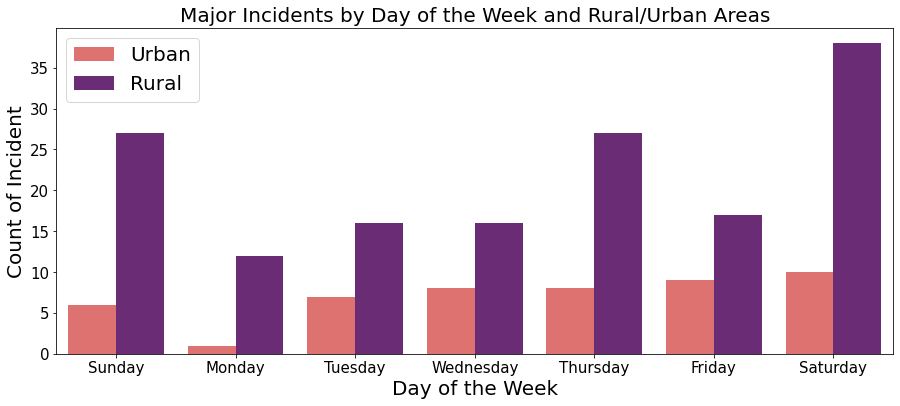

In [22]:
sns.countplot(major_incidents.day_of_week, hue = major_incidents.urban_or_rural_area, order=xticks, palette = "magma_r")
plt.title('Major Incidents by Day of the Week and Rural/Urban Areas', fontsize = 20)
plt.xlabel('Day of the Week', fontsize=20)
plt.ylabel("Count of Incident", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

In [23]:
# proportion of major incidents in rural and urban areas
round(major_incidents.urban_or_rural_area.value_counts(normalize=True),4)

Rural    0.7574
Urban    0.2426
Name: urban_or_rural_area, dtype: float64

The countplot above shows that most major incidents - that were reported - in the UK in 2020 occurred in Rural Areas (about 75.74 %).
<br>
It also shows that <b> Rural areas recorded the highest number of major incidents</b> on:
 - Saturday
 - Sunday
 - Thursday
 <br>
 
Urban areas had a fairly constant number of major incidents going from Tuesday to Sunday; Monday showed a very low number compared to others.
This suggests that the trend seen in the plot of the Days of the Week hued by the time of the day could be attributed to major incidents that occurred in Rural areas. To further scrutinize this assumption, a plot segmenting rural areas by the day of the week and the time of the day is shown below: 

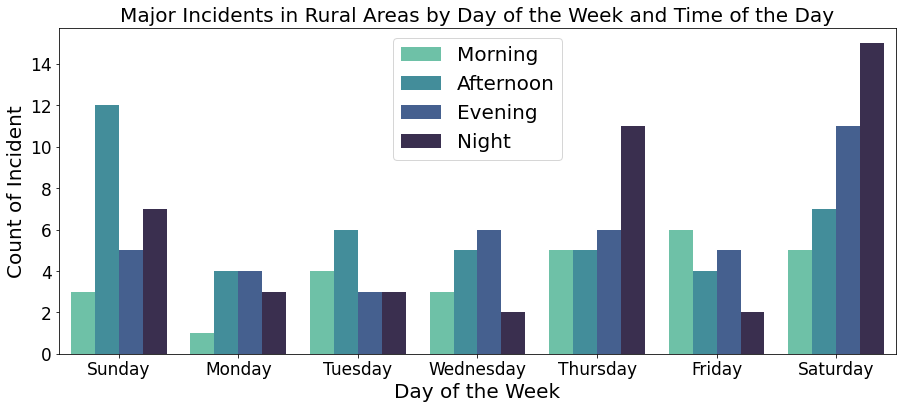

In [24]:
rural = major_incidents[major_incidents.urban_or_rural_area=="Rural"]
xticks = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.countplot(rural.day_of_week, hue = rural.time_of_day, order = xticks,
              hue_order = ["Morning", "Afternoon", "Evening", "Night"],palette="mako_r" )
plt.title('Major Incidents in Rural Areas by Day of the Week and Time of the Day', fontsize = 20)
plt.xlabel('Day of the Week', fontsize=20)
plt.ylabel("Count of Incident", fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

The countplot above shows the highest number of major incidents by day of the week and time of the day for Rural areas is 14
<br>
The countplot also shows that <b>most major incidents</b> that occurred <b> in Rural areas</b> in the UK in 2020 occured on:
 - Saturday - EVENING AND NIGHT
 - Sunday - AFTERNOON AND NIGHT
 - Thursday - EVENING AND NIGHT
<br>

This further supports the idea that the trend in the number of major incidents by day of the week and time of the day is strongly associated with Rural areas. To further confirm this, a plot segmenting urban areas by day of the week and time of the day is shown below.
 

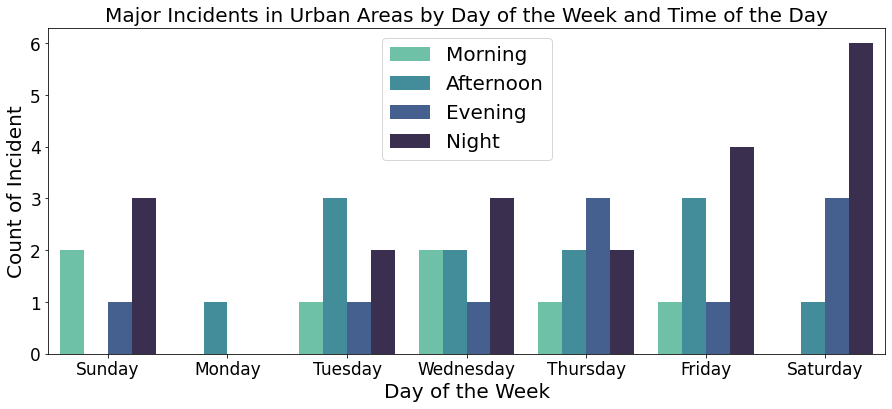

In [25]:
urban = major_incidents[major_incidents.urban_or_rural_area=="Urban"]
xticks = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.countplot(urban.day_of_week, hue = urban.time_of_day, order = xticks,
              hue_order = ["Morning", "Afternoon", "Evening", "Night"],palette="mako_r" )
plt.title('Major Incidents in Urban Areas by Day of the Week and Time of the Day', fontsize = 20)
plt.xlabel('Day of the Week', fontsize=20)
plt.ylabel("Count of Incident", fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

The countplot above shows the highest number of major incidents by day of the week and time of the day for Urban areas in the UK in 2020 is 6
<br>
The countplot also shows that <b> most major incidents</b> that occurred <b>in Urban areas</b> in the UK in 2020 occurred on:
 - Saturday - EVENING AND NIGHT
 - Sunday - MORNING AND NIGHT
 - Tuesday - AFTERNOON
 - Wednesday - NIGHT
 - Thurday - EVENING
 - Friday - AFTERNOON AND NIGHT

In additon, <b>Urban areas had no major incident</b> on:
 - Sunday afternoon
 - Monday morning, evening and night (explains why monday had the lowest major-incident occurrence in the combined plot)

<br>

The number of major incidents for each day of the week and time of the day for Urban areas pales in comparison to the number of major incidents for each day of the week and time of the day for rural areas.
This further supports the idea that the trend in the number of major incidents in the combined plot is strongly associated with Rural areas. 
<br>
Further visualization of number of major incidents segmented by rural/urban areas and time of the day is shown below. 

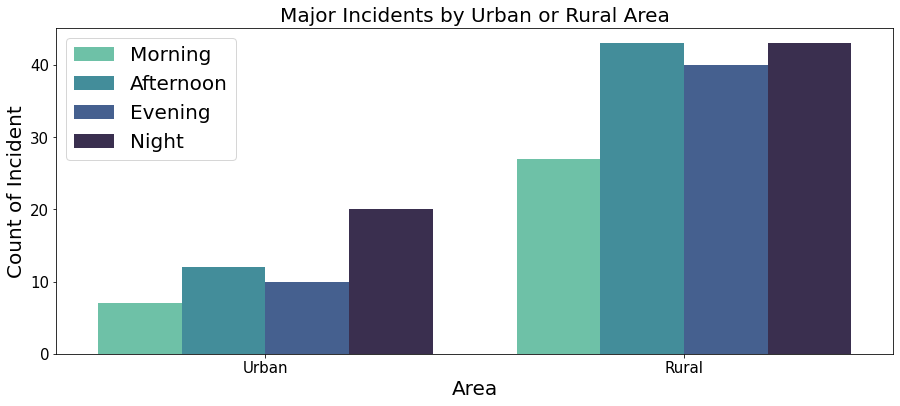

In [26]:
sns.countplot(major_incidents.urban_or_rural_area, hue = major_incidents.time_of_day, palette="mako_r",
              hue_order = ["Morning", "Afternoon", "Evening", "Night"])             
plt.title('Major Incidents by Urban or Rural Area', fontsize = 20)
plt.xlabel('Area', fontsize=20)
plt.ylabel("Count of Incident", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

For each time of the day - morning, afternoon, evening and night - more major incidents occurred in rural areas than in urban areas

#### Comparing Factors in Major Incidents and Other Incidents

In [27]:
# setting the figure size for each plot in this section
plt.rcParams["figure.figsize"] = (15, 12)

A lot of countplots would be created in this section of the report. To avoid duplication of effort and excess codes for each plot, three (3) functions would be created and used to plot all the countplots that would be made in this section of the report.
 - The first function creates subplots hued by time of the day
 - The second function creates subplots hued by rural/urban areas
 - The third function is for subplots where the labels on the x-axis need to be rotated to avoid overlapping. Plots created with this function can be hued by either the time of the day or rural/urban areas.
 
When each function is called, two subplots are returned: one for major incidents and one for other incidents.
<br>
For each subplots created in this section of the report, <b>values recorded as unknown or self-reported were not included</b>. This is primarily because, for the intent of interpreting how each factor affected major or other incidents, missing and unknown values do not offer much information apart from helping us know the number of incidents that had missing or unknown values for that factor. 
<br>
This report, however, <b>focuses on interpreting how known values of a factor affected the number of major and other incidents that occurred in the UK in 2020 </b> from the data provided.

In [28]:
def create_plot(columns1, columns2, major_df, other_df, title, xticks=False):
    """
    This function creates 2 subplots. The first plot represents an attribute or characteristic of interest in Major Incidents
    with the hue set to the time of the day.
    The Second plot represents an attribute or characteristic of interest in Other incidents with the hue set to the time of the day.
    """
    hue1 = major_df.time_of_day
    hue2 = other_df.time_of_day
    fig, axes = plt.subplots(2,1)
    if xticks:
        xticks = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
        sns.countplot(columns1, hue = hue1, order = xticks, hue_order = ["Morning", "Afternoon", "Evening", "Night"], 
                      palette = "mako_r", ax = axes[0])
        sns.countplot(columns2, hue = hue2, order = xticks, hue_order = ["Morning", "Afternoon", "Evening", "Night"],
                      palette = "mako_r", ax = axes[1])
    else:
        sns.countplot(columns1, hue = hue1, hue_order = ["Morning", "Afternoon", "Evening", "Night"], palette = "mako_r",
                      ax = axes[0])
        sns.countplot(columns2, hue = hue2, hue_order = ["Morning", "Afternoon", "Evening", "Night"], palette = "mako_r",
                      ax = axes[1])
    axes[0].set_title('Major Incidents', fontsize = 15, loc="left" )
    axes[1].set_title('Other Incidents', fontsize = 15, loc="left" )
    axes[0].set_ylabel("Count of Incident", fontsize=15)
    axes[1].set_ylabel("Count of Incident", fontsize=15)
    axes[0].set(xlabel=None)
    axes[1].set(xlabel=None)
    axes[0].legend(fontsize=12, loc = "upper left")
    axes[1].legend(fontsize=12, loc = "upper left")
    axes[0].tick_params(labelsize=12)
    axes[1].tick_params(labelsize=12)
    fig.suptitle(title, size=15, y= 1.0)
    fig.tight_layout()

In [29]:
def create_ruralUrban(columns1, columns2, major_df, other_df, title, xticks = False):
    """
    This function creates 2 subplots. The first plot represents an attribute or characteristic of interest in Major Incidents
    with the hue set to differentiate between rural and urban areas.
    The Second plot represents an attribute or characteristic of interest in Other incidents with the hue set to differentiate between
    rural and urban areas.
    """
    hue1 = major_df.urban_or_rural_area
    hue2 = other_df.urban_or_rural_area
    global fig
    fig, axes = plt.subplots(2, 1)
    if xticks:
        xticks = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
        sns.countplot(columns1, hue=hue1, order = xticks, palette="magma_r", ax = axes[0])
        sns.countplot(columns2, hue= hue2, order = xticks, palette = "magma_r", ax = axes[1])
    else:
        sns.countplot(columns1, hue=hue1,hue_order = ["Urban", "Rural"], palette="magma_r", ax = axes[0])
        sns.countplot(columns2, hue= hue2, palette = "magma_r", ax = axes[1])
    axes[0].set_title('Major Incidents', fontsize = 15, loc="left" )
    axes[1].set_title('Other Incidents', fontsize = 15, loc="left" )
    axes[0].set_ylabel("Count of Incident", fontsize=15)
    axes[1].set_ylabel("Count of Incident", fontsize=15)
    axes[0].set(xlabel=None)
    axes[1].set(xlabel=None)
    axes[0].legend(fontsize=12, loc ="upper left")
    axes[1].legend(fontsize=12, loc="upper left")
    axes[0].tick_params(labelsize=12)
    axes[1].tick_params(labelsize=12)
    fig.suptitle(title, size=15, y=1.0)
    fig.tight_layout()

In [30]:
def plotLong(col, major_df, other_df, title, hue1=None, hue2 = None, xticks = False):
    """
    This function combines the abilities/functionalities of create_plot and create_ruralUrban with the added functionality of rotating 
    the labels of the x-axis to prevent overlapping of the labels.
    
    """
    major = major_df[(major_df[col]!="Data missing or out of range") & (major_df[col]!="unknown (self reported)")]
    other = other_df[(other_df[col]!="Data missing or out of range") & (other_df[col]!="unknown (self reported)")]
    fig, axes = plt.subplots(2,1)
    if hue2:
        hue2 = "time_of_day"
        if xticks:
            xticks = ['No physical crossing facilities within 50 metres','Footbridge or subway','Zebra', 'Central refuge',
        'Pedestrian phase at traffic signal junction', "Pelican, puffin, toucan or similar non-junction pedestrian light crossing"]
            ax1 = sns.countplot(major[col], order=xticks, hue = major[hue2], hue_order = ["Morning", "Afternoon", "Evening", "Night"], 
                                palette="mako_r", ax = axes[0])
            ax2 = sns.countplot(other[col], order = xticks, hue = other[hue2], hue_order=["Morning", "Afternoon", "Evening", "Night"],
                                 palette="mako_r", ax = axes[1])
        else:
            ax1 = sns.countplot(major[col], hue = major[hue2], hue_order = ["Morning", "Afternoon", "Evening", "Night"],
                                palette="mako_r", ax = axes[0])
            ax2 = sns.countplot(other[col], hue = other[hue2], hue_order = ["Morning", "Afternoon", "Evening", "Night"],
                                palette="mako_r", ax = axes[1])
    else:
        hue1 = "urban_or_rural_area"
        if xticks:
            xticks = ['No physical crossing facilities within 50 metres','Footbridge or subway','Zebra', 'Central refuge',
         'Pedestrian phase at traffic signal junction', "Pelican, puffin, toucan or similar non-junction pedestrian light crossing"]
            ax1 = sns.countplot(major[col], order=xticks, hue = major[hue1], palette="magma_r", ax = axes[0])
            ax2 = sns.countplot(other[col], order = xticks, hue = other[hue1], palette="magma_r", ax = axes[1])
        else:
            ax1 = sns.countplot(major[col], hue = major[hue1], hue_order= ["Urban", "Rural"], palette="magma_r", ax = axes[0])
            ax2 = sns.countplot(other[col], hue = other[hue1], palette="magma_r", ax = axes[1])
    fig.suptitle(title, fontsize = 15, y=1.0)
    axes[0].set(xlabel=None)
    axes[1].set(xlabel=None)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=6, ha="center")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=10, ha="center")
    axes[0].set_title('Major Incidents', fontsize = 15, loc="left" )
    axes[1].set_title('Other Incidents', fontsize = 15, loc="left" )
    axes[0].set_ylabel("Count of Incident", fontsize=15)
    axes[1].set_ylabel("Count of Incident", fontsize=15)
    axes[0].legend(fontsize=12, loc = "upper left")
    axes[1].legend(fontsize=12, loc = "upper left")
    axes[0].tick_params(labelsize=11)
    axes[1].tick_params(labelsize=11)
    fig.tight_layout()
        
        

#### Major and Other Incidents by Day of the Week and Time of the Day

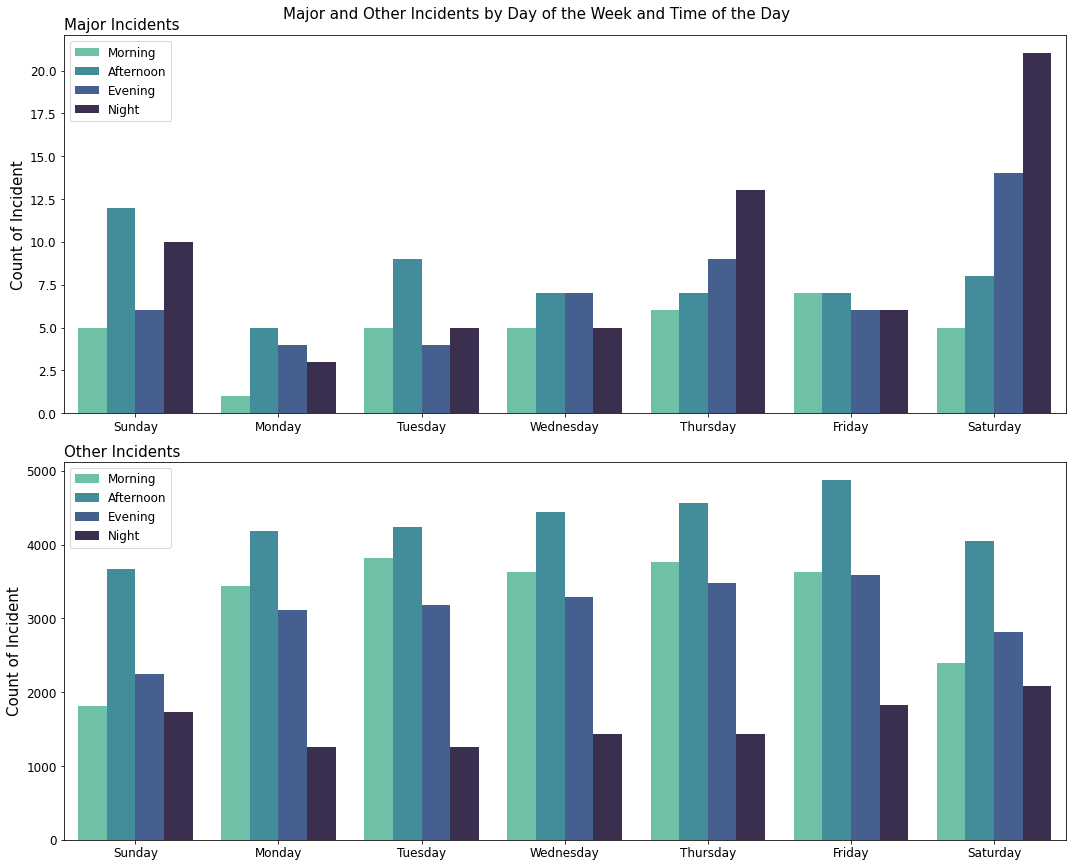

In [31]:
title = "Major and Other Incidents by Day of the Week and Time of the Day"
create_plot(major_incidents.day_of_week, other_incidents.day_of_week, major_incidents, other_incidents, title, xticks=True)

From the first visualization in this report and the first subplot shown above, major incidents had the most occurrence on Saturdays, Sundays, Thursdays and Tuesday afternoons
<br>
In constrast, other incidents had the most occurrence from Monday to Friday and the least occurrence on Saturdays and Sundays
<br>
Additionally, the subplots above shows that while most major incidents had higher occurrences at night, other incidents had higher occurrences in the day time - morning, afternoon, and evening - and comparatively low counts at night.

#### Major and Other Incidents by Day of the Week and Rural/Urban Area

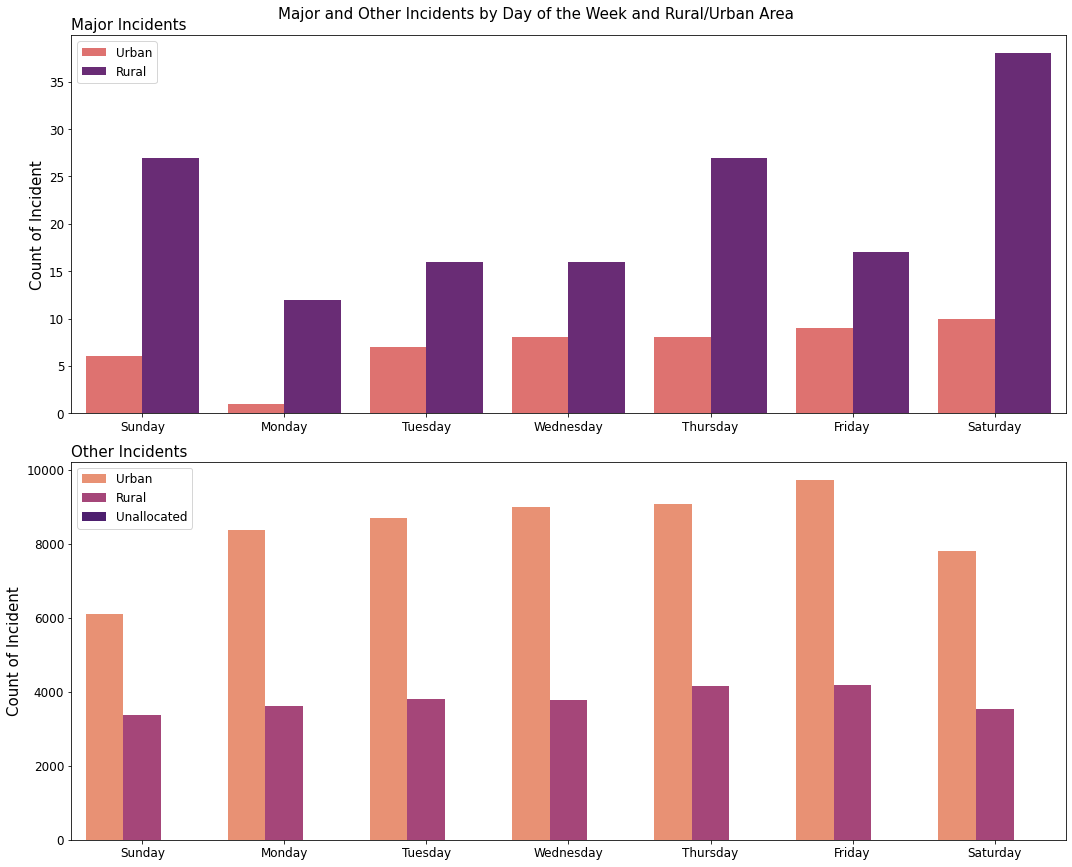

In [32]:
title = "Major and Other Incidents by Day of the Week and Rural/Urban Area"
create_ruralUrban(major_incidents.day_of_week, other_incidents.day_of_week, major_incidents, other_incidents, title, xticks=True)

In [33]:
# proportion of other incidents in rural and urban areas
round(other_incidents.urban_or_rural_area.value_counts(normalize=True),4)

Urban          0.6897
Rural          0.3101
Unallocated    0.0002
Name: urban_or_rural_area, dtype: float64

The subplots above shows that for all days of the week:
 - Major incidents happened a lot more in rural areas than in urban areas - approximately 75.74 %
 - Other incidents happened a lot more in urban areas than in rural areas - approximately 69 %
<br>

The plots generally show reverse trends when compared with each other. This reverse trend is further emphasized in the plot of major and other incidents segmented by rural and urban areas and by time of the day. This plot is shown below

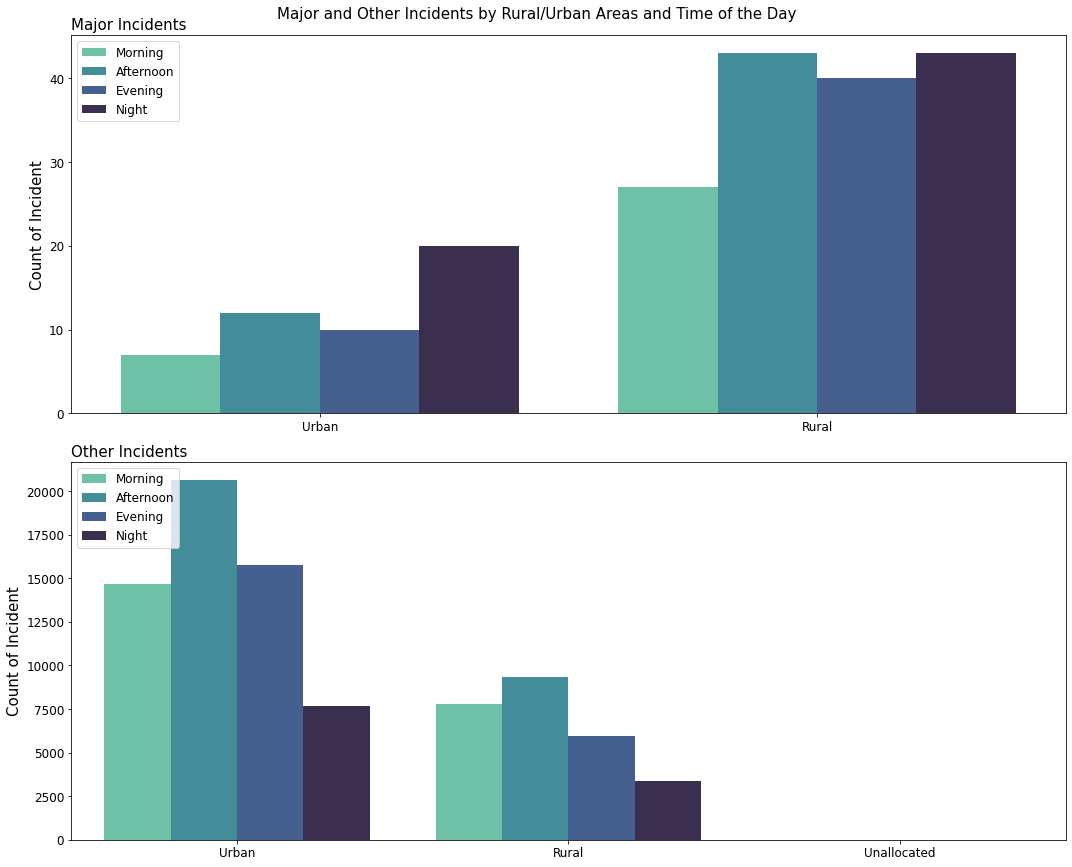

In [34]:
title = "Major and Other Incidents by Rural/Urban Areas and Time of the Day"
create_plot(major_incidents.urban_or_rural_area, other_incidents.urban_or_rural_area, major_incidents, other_incidents, title = title)

The subplots above show that for each time of the day - morning, afternoon, evening and night - urban areas have higher number of other incidents than rural areas. The reverse case is true for major incidents

#### Major and Other Incidents by Human-Controlled Pedestrian Crossing

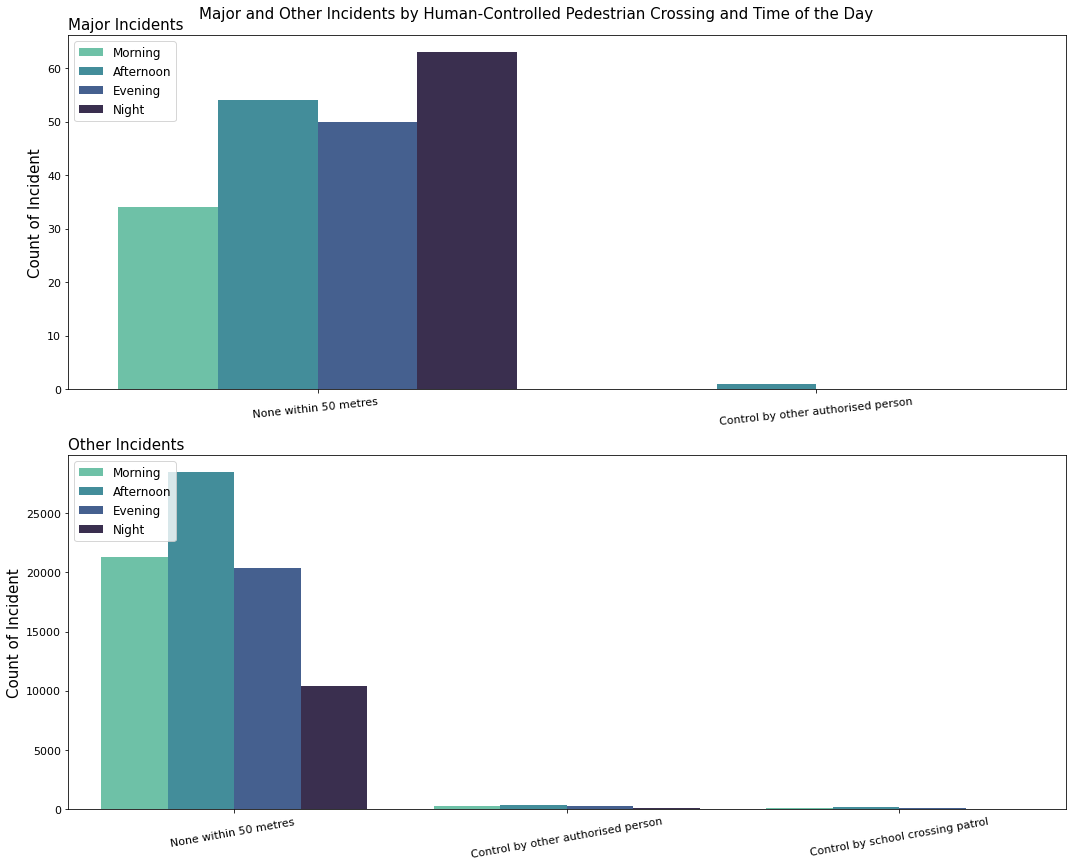

In [35]:
title = 'Major and Other Incidents by Human-Controlled Pedestrian Crossing and Time of the Day'
plotLong("pedestrian_crossing_human_control", major_incidents, other_incidents, title, hue2=1)

In [36]:
# proportion of major incidents in each category of human-controlled pedestrian crossing
round(major_incidents.pedestrian_crossing_human_control.value_counts(normalize=True),4)

None within 50 metres                 0.995
Control by other authorised person    0.005
Name: pedestrian_crossing_human_control, dtype: float64

In [37]:
# proportion of other incidents in each category of human-controlled pedestrian crossing
round(other_incidents.pedestrian_crossing_human_control.value_counts(normalize=True),4)

None within 50 metres                 0.9448
unknown (self reported)               0.0382
Control by other authorised person    0.0110
Control by school crossing patrol     0.0044
Data missing or out of range          0.0016
Name: pedestrian_crossing_human_control, dtype: float64

The subplots above show that for almost all major (~99.51%) and other incidents (94.48%) that occurred in the UK in 2020, there were no human-controlled pedestrian crossings within 50 meters of where the incidents occurred. 
<br>
This could mean these incidents occurred in areas that do not need human-controlled pedestrian crossing or it could also point to the need of human-controlled pedestrian crossing in these areas. To make a decision about this, more information would be needed.
<br>
This is also shown in the figure below with the difference of the hue being "rural/urban areas" instead of the time of the day; and the remphasis of more major incidents occurring in the rural areas than in urban areas and vice versa for other incidents

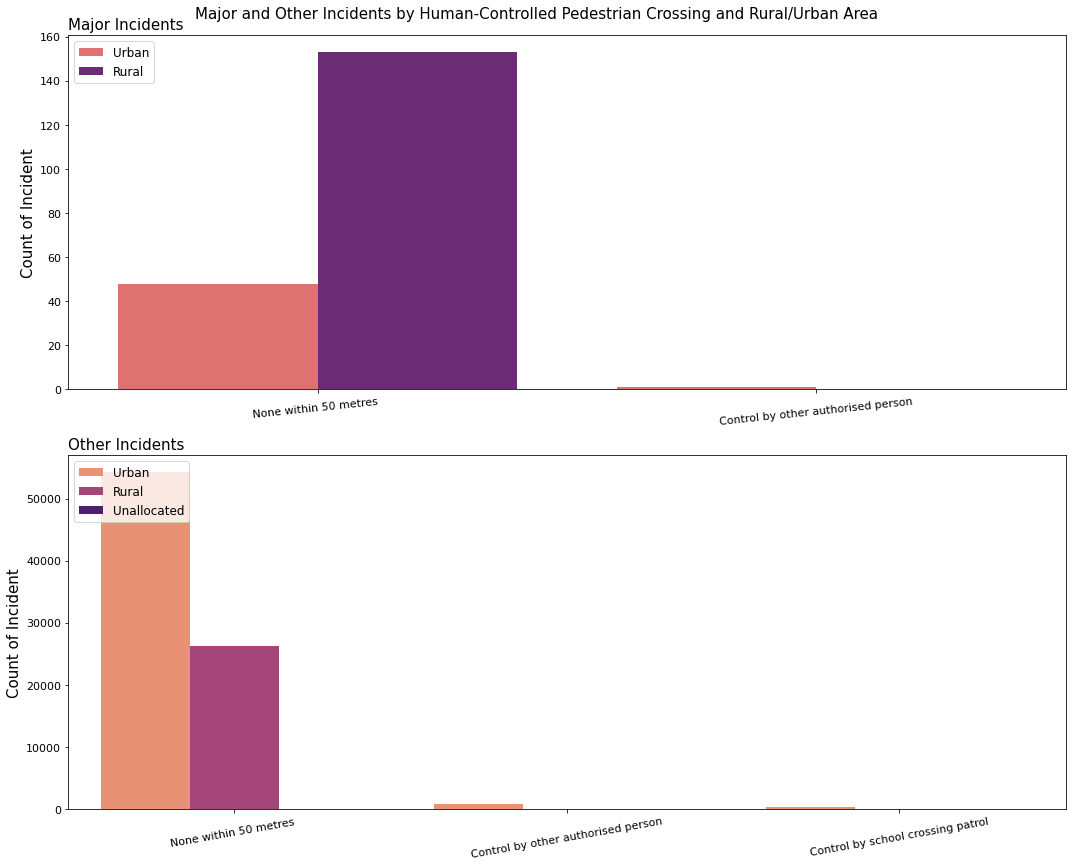

In [38]:
title = 'Major and Other Incidents by Human-Controlled Pedestrian Crossing and Rural/Urban Area'
plotLong("pedestrian_crossing_human_control", major_incidents, other_incidents, title, hue1=1)

#### Major and Other Incidents by Physical Facilities-Controlled Pedestrian Crossing 

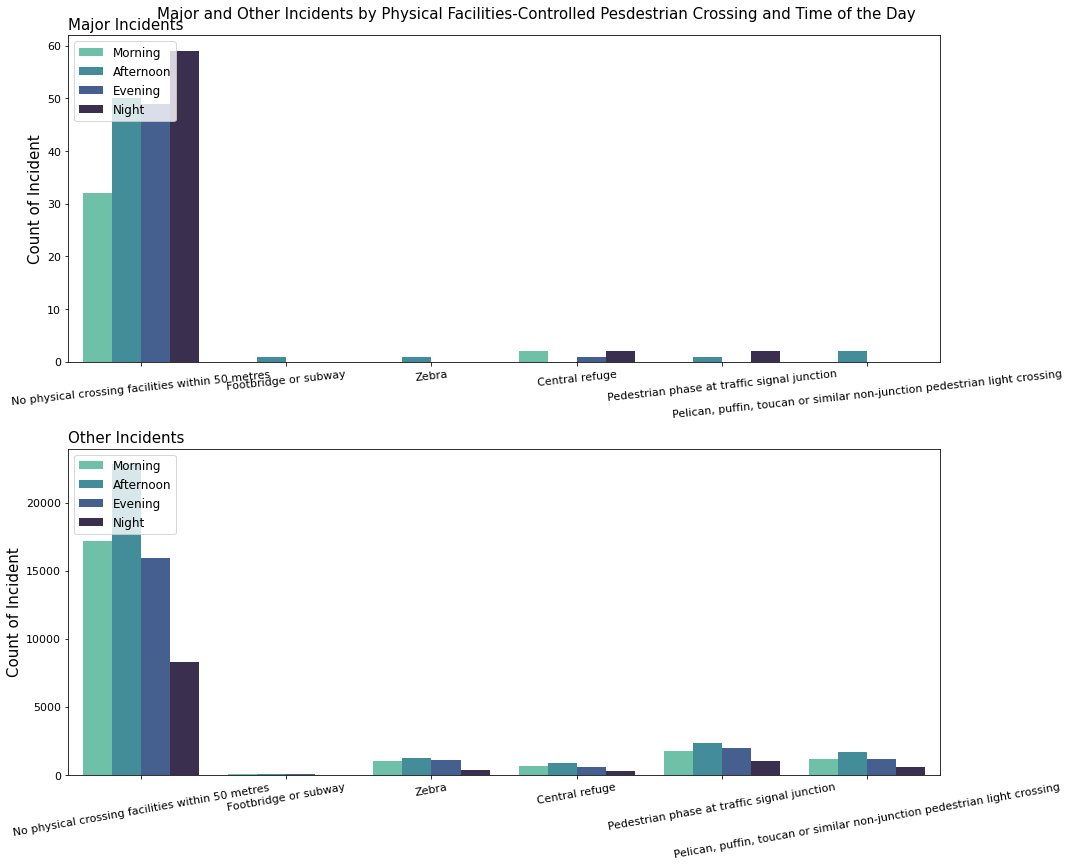

In [39]:
title = 'Major and Other Incidents by Physical Facilities-Controlled Pesdestrian Crossing and Time of the Day'
plotLong("pedestrian_crossing_physical_facilities",major_incidents, other_incidents,title = title, hue2=1, xticks=True)

The above subplots shows a similar trend to the trend observed in human-controlled pedestrian crossing with the exception that areas with some facilities-controlled pedestrian crossing recorded both major and other incidents - although, a comparatively very low number.
<br>
This could mean these incidents occurred in areas that do not need these facilities; or it could be pointing to the need for these facilities in these areas. To make a decision about this, more information would be needed.
<br>
The plot also emphasized that the highest number of other incidents occurred in the day time - morning, afternoon, evening - and least at night. The reverse case is true for major incidents

In [40]:
# proportion of major incidents for each category of facilities-controlled pedestrian crossing
print(round(major_incidents.pedestrian_crossing_physical_facilities.value_counts(normalize=True),4))

No physical crossing facilities within 50 metres                             0.9406
Central refuge                                                               0.0248
Pedestrian phase at traffic signal junction                                  0.0149
Pelican, puffin, toucan or similar non-junction pedestrian light crossing    0.0099
Zebra                                                                        0.0050
Footbridge or subway                                                         0.0050
Name: pedestrian_crossing_physical_facilities, dtype: float64


In [41]:
# proportion of other incidents for each category of facilities-controlled pedestrian crossing
round(other_incidents.pedestrian_crossing_physical_facilities.value_counts(normalize=True),4)

No physical crossing facilities within 50 metres                             0.7544
Pedestrian phase at traffic signal junction                                  0.0831
Pelican, puffin, toucan or similar non-junction pedestrian light crossing    0.0544
Zebra                                                                        0.0435
unknown (self reported)                                                      0.0337
Central refuge                                                               0.0272
Footbridge or subway                                                         0.0022
Data missing or out of range                                                 0.0015
Name: pedestrian_crossing_physical_facilities, dtype: float64

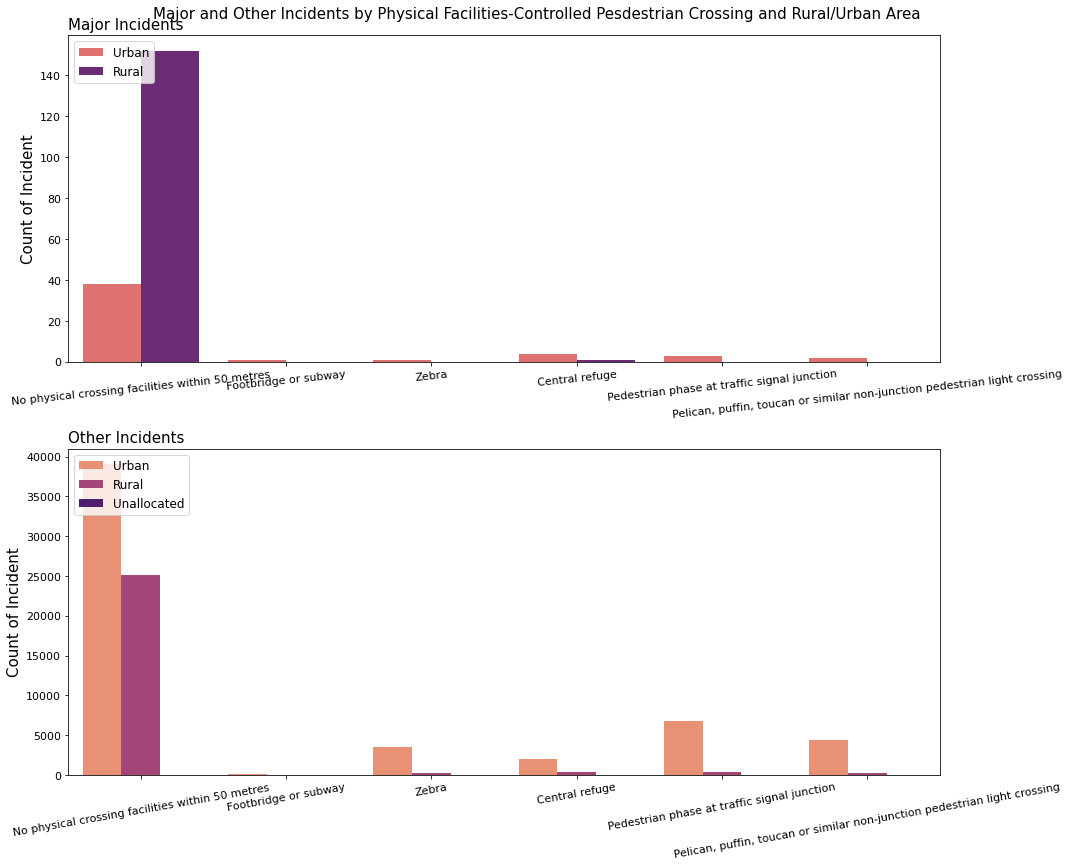

In [42]:
title = 'Major and Other Incidents by Physical Facilities-Controlled Pesdestrian Crossing and Rural/Urban Area'
plotLong("pedestrian_crossing_physical_facilities", major_incidents, other_incidents, title = title, hue1 = 1, xticks=True)

The above subplots show that a high majority of major and other incidents occurred in areas where there were no physical crossing facilities within 50 meters.
<br>
Again, this could mean these areas do not need these facilities; or, it could point to a need for these facilities in these areas. More information would be needed to make this decision.
<br>
The subplots also show very few major and other incidents occurred in areas that had some physical crossing facilities installed. Urban areas had the most number of incidents in these areas. This could mean less incidents occur in rural areas that have these facilities or rural areas do not have much of these facilities installed. More information/data would be needed to confirm this.


#### Major and Other Incidents by Road Type

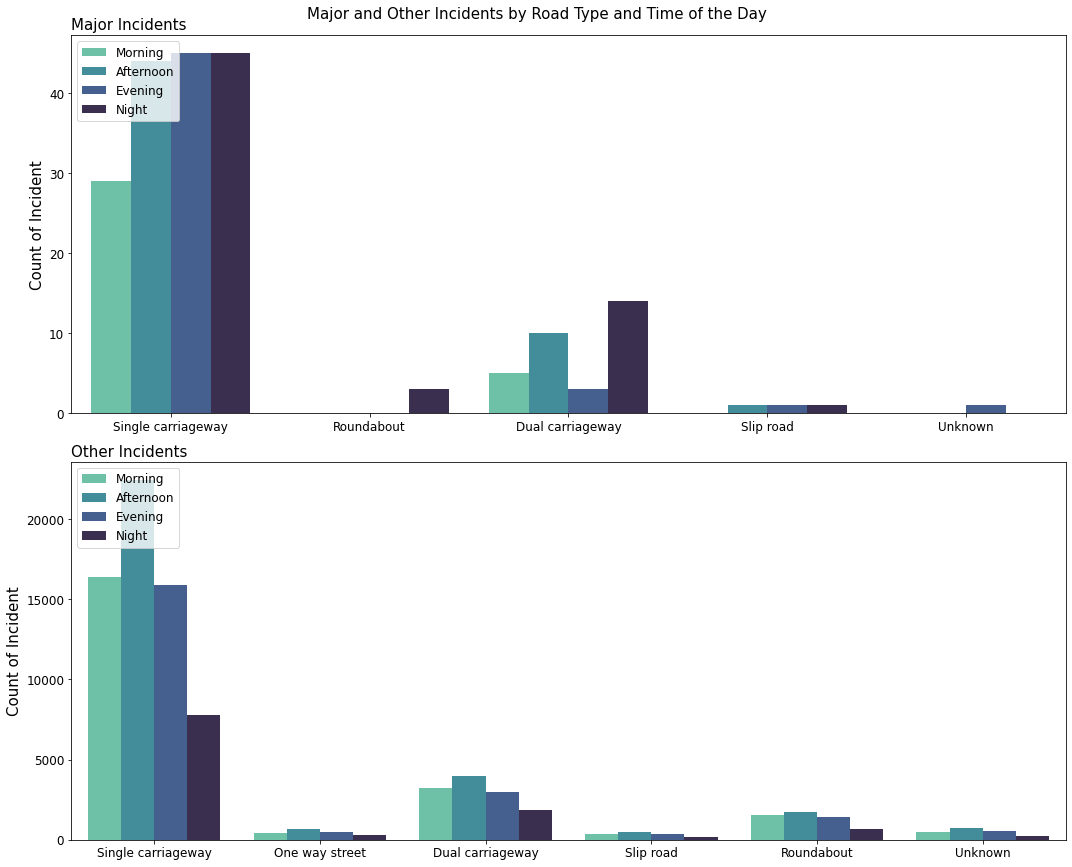

In [43]:
title = "Major and Other Incidents by Road Type and Time of the Day"
create_plot(major_incidents.road_type, other_incidents.road_type, major_incidents, other_incidents, title)

The subplots above shows that a high majority of major (~80.69%) and other incident (73.43%) occurred on a single carriageway, with more incidents occurring in the afternoon, evening and night for major incidents, and morning, afternoon and evening for other incidents.
<br>
They also both show dual carriageways have the second highest number of major and other incidents although these number pales in comparison to the number of major and other incidents on single carriageways.
<br>
Given that previous analysis in this report showed a high majority of major and other incidents occurred in areas that had no human-controlled or facilities-controlled pedestrian crossings within 50 meters, single carriageways stands out as an area of interest for this characteristic.

In [44]:
# proportion of major incidents in each category of road type
print(round(major_incidents.road_type.value_counts(normalize=True), 4 ))

Single carriageway    0.8069
Dual carriageway      0.1584
Roundabout            0.0149
Slip road             0.0149
Unknown               0.0050
Name: road_type, dtype: float64


In [45]:
# proportion of other incidents in each category of road type
round(other_incidents.road_type.value_counts(normalize=True),4)

Single carriageway    0.7343
Dual carriageway      0.1404
Roundabout            0.0633
Unknown               0.0231
One way street        0.0225
Slip road             0.0164
Name: road_type, dtype: float64

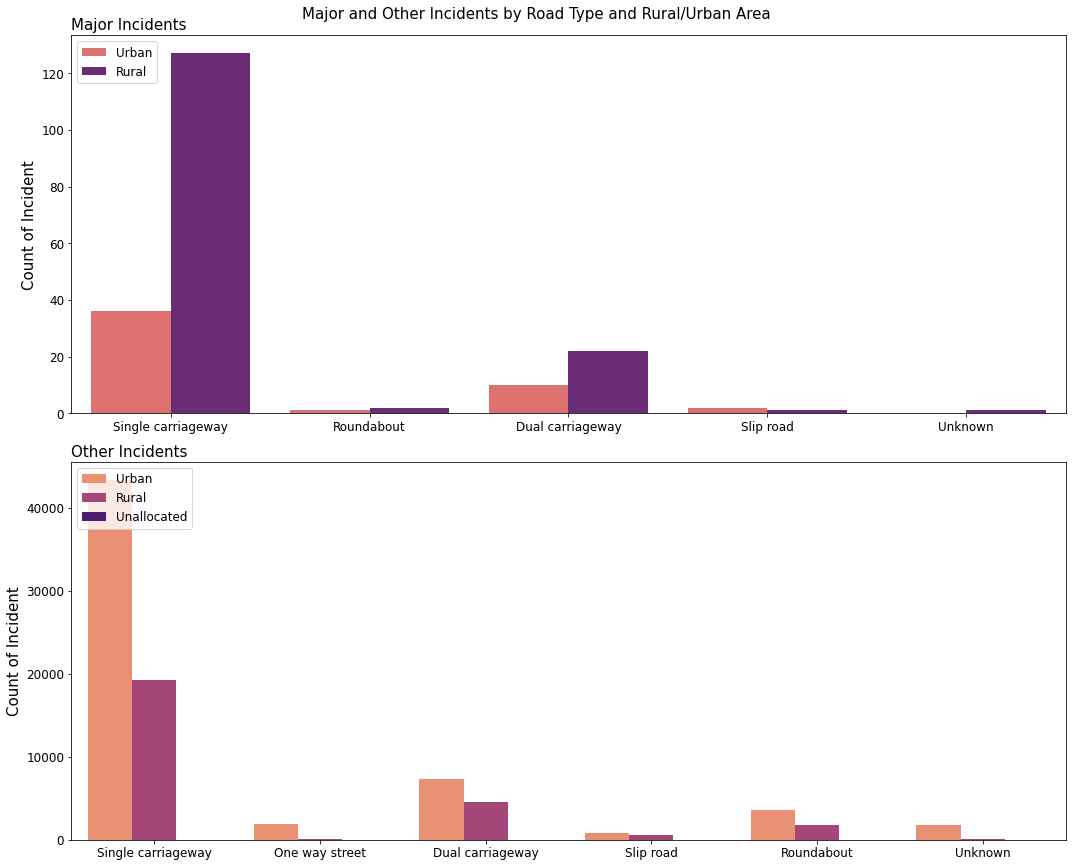

In [46]:
title = "Major and Other Incidents by Road Type and Rural/Urban Area"
create_ruralUrban(major_incidents.road_type, other_incidents.road_type, major_incidents, other_incidents, title)

The same trend seeen in the subplots for the road type and time of day is seen here as well, with the difference being most major incidents occurred in rural areas than in urban areas and vice versa for other incidents.
<br>
Most major incidents in both rural and urban areas occurred on single carriageways. Next to it is dual carriageways; but, the number of incidents on single carriageways is a lot more higher than that of dual carriageways.
<br>
Most "other incidents" in both rural and urban areas occurred on single carriageways. Next to it is dual carriageways; but, the number of incidents on single carriageways is a lot more higher than that of dual carriageways.

#### Major and Other Incidents by Light Conditions

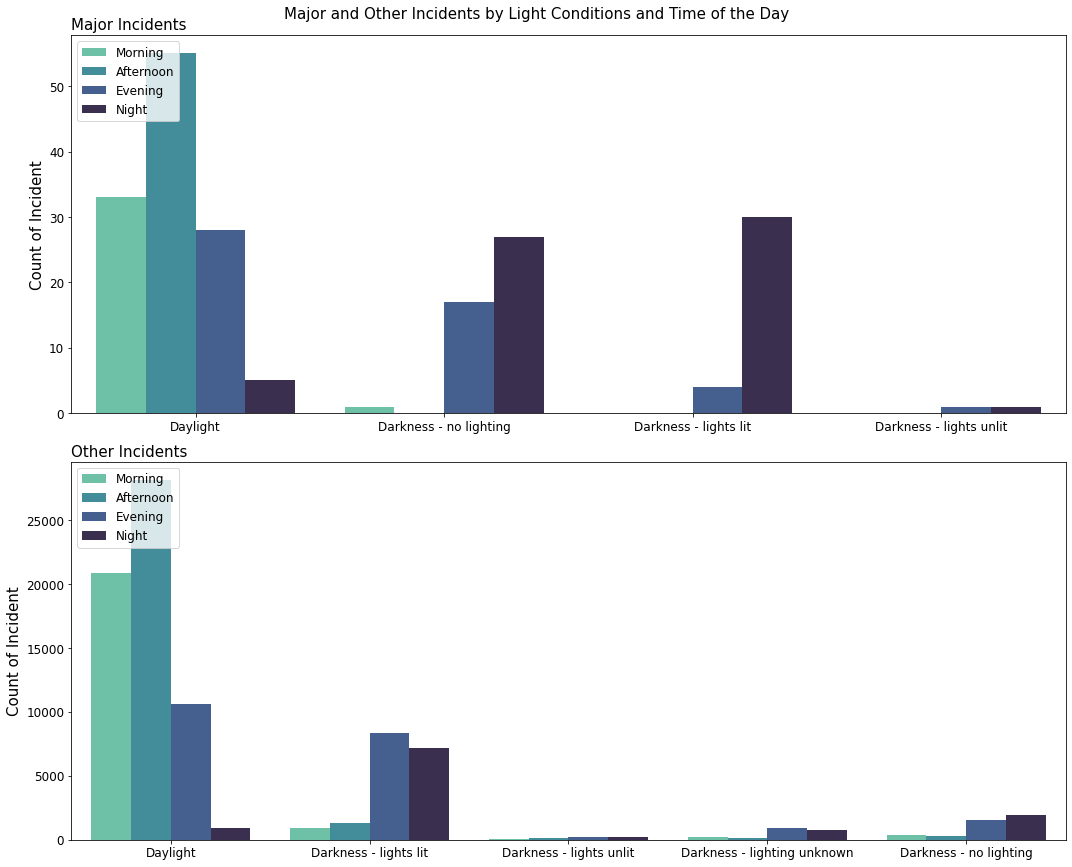

In [47]:
title = "Major and Other Incidents by Light Conditions and Time of the Day"
create_plot(major_incidents.light_conditions, other_incidents.light_conditions, major_incidents, other_incidents, title)

The subplots above show that for both major (~60%) and other incidents (71%), a high majority of the accidents occurred during daylight. Major and minor incidents that occurred during daylight happened mostly in the afternoon than in the morning or evening.
<br>
For both type of incidents, the highest number of night incidents occurred when lights were lit.
<br>
There is a considerably large number of major incidents that occurred when it was dark and there was no lighting in the area - approximately 22.28%. The highest number of these incidents occurred at night, with evening be the second highest.
<br>
Further analysis of this factor is shown in the plot below, with ighting conditions segmented by rural and urban areas. 


In [48]:
# proportion of major incidents in each category of light conditions
round(major_incidents.light_conditions.value_counts(normalize=True),4)

Daylight                   0.5990
Darkness - no lighting     0.2228
Darkness - lights lit      0.1683
Darkness - lights unlit    0.0099
Name: light_conditions, dtype: float64

In [49]:
# proportion of other incidents in each category of light conditions
round(other_incidents.light_conditions.value_counts(normalize=True), 4)

Daylight                       0.7108
Darkness - lights lit          0.2081
Darkness - no lighting         0.0488
Darkness - lighting unknown    0.0248
Darkness - lights unlit        0.0075
Name: light_conditions, dtype: float64

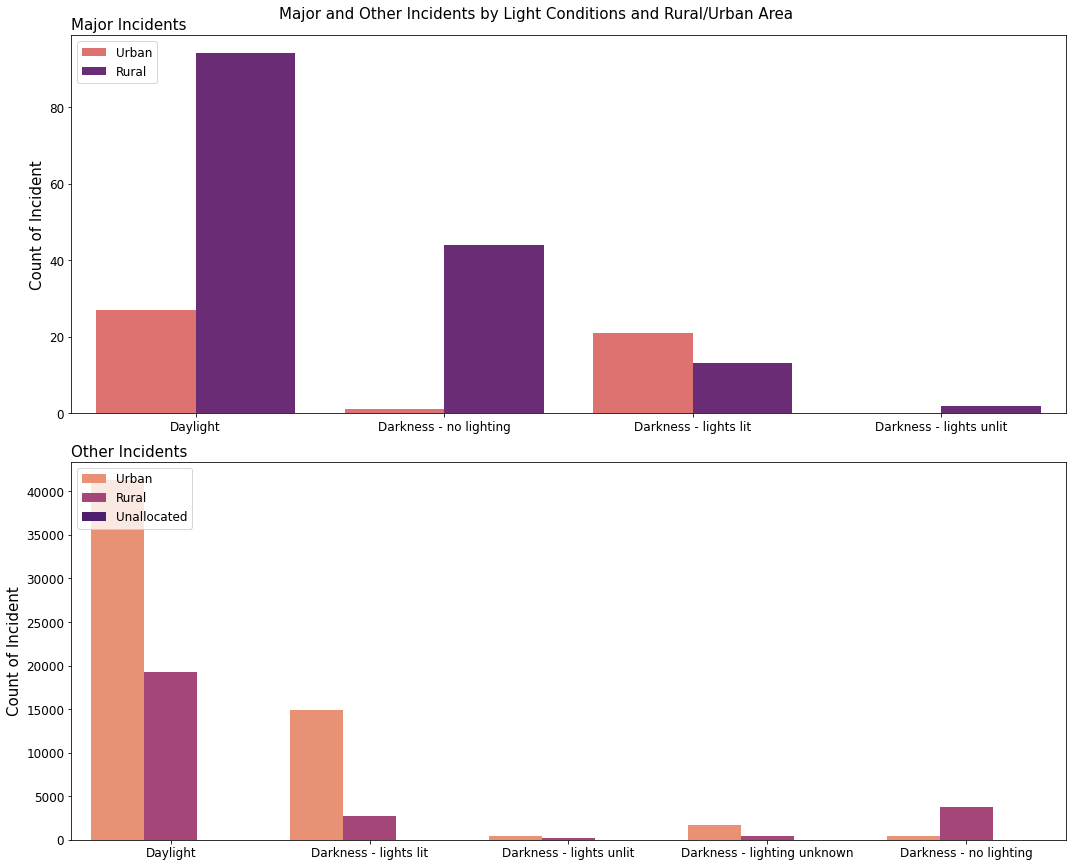

In [50]:
title = "Major and Other Incidents by Light Conditions and Rural/Urban Area"
create_ruralUrban(major_incidents.light_conditions, other_incidents.light_conditions, major_incidents, other_incidents, title)

From the subplots above, the following can be observed:
   - Rural areas had the highest number of major incidents for the lighting conditions "daylight" and "Darkness - no lighting".
   - Most major and other incidents occurred during daylight
   - There is a very significant difference between number of major incidents for rural and urban areas when the lighting conditions was "Darkness-no lighting". Rural areas had a significantly higher number of major incidents associated with them than urban areas. This could happen for different reasons. To further assess the situation, more information/data about the phenomena would be the needed. This shows that, for the lighting condition "Darkness - no lighting", almost all of the major incidents - in the evening and night - occcurred in rural areas.
- Urban areas had the highest count of major incidents for the lighting condition "Darkness - lights lit".
 - With the exception of the lighting Condition "Darkness - no lighting", every lighting condtion involving other incidents had higher number of incidents in urban areas than in rural areas. This could indicate rural areas may have challenges with lighting during the evenings and at night.

#### Major and Other Incidents by Junction Type

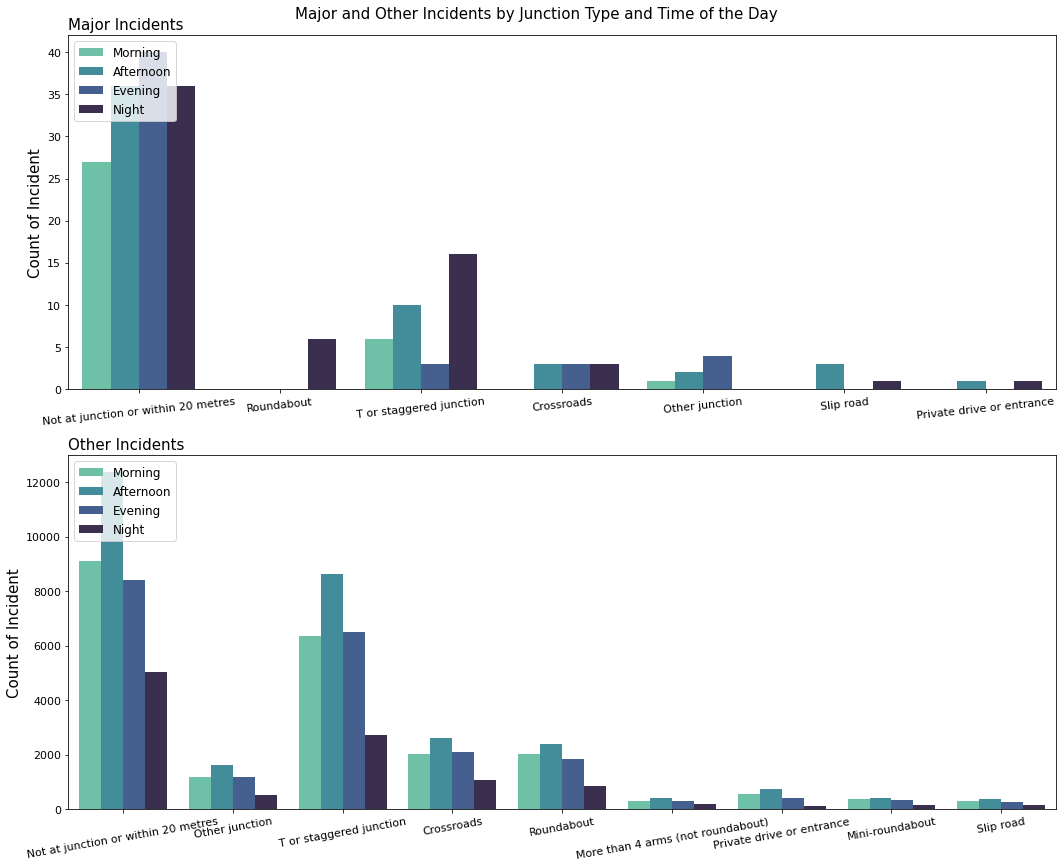

In [51]:
title = "Major and Other Incidents by Junction Type and Time of the Day"
plotLong("junction_detail", major_incidents, other_incidents, title, hue2 = 1)

The subplots above show the following:
 - Major and Other incidents occurred more often in places that had no junction within 20 meters and at T or staggered junctions.
 - Major incidents that occurred in places that had no junction within 20 meters happened mostly in the afternoons, evenings and at night.
 - Major incidents that occurred at T or staggered junctions occurred mostly at night.
 - Other incidents that occurred in places that had no junction within 20 meters and at T or staggered junctions happended mostly in the Mornings, Afternoons and Evenings.


Further exploration of this feature in Rural and Urban areas is shown below:

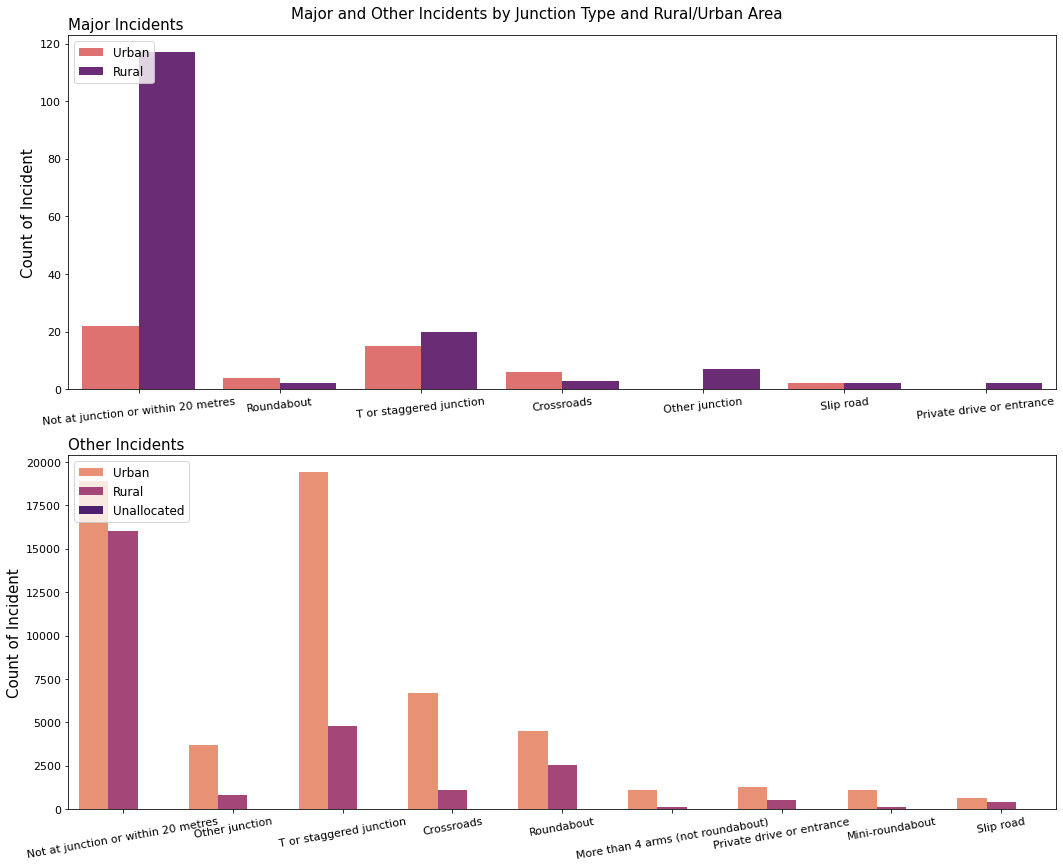

In [52]:
title = "Major and Other Incidents by Junction Type and Rural/Urban Area"
plotLong("junction_detail", major_incidents, other_incidents, title, hue1 = 1)

The subplots above show that most of the major incidents that occurred in rural areas occurred in areas with no Junction within 20 meters. The subplots also show that with the exception of crossroads, rural areas had a higher number of major incidents than urban areas for every junction category.
<br>
Additionally, for every junction category, urban areas had a higher number of other incidents than rural areas. 
<br>
Compared to previous plots of rural vs urban areas for other incidents, the difference between the number of other incidents that occurred in areas with no junction within 20 meter for urban and rural areas is small. Also the majority of other incidents in urban areas occurred at T or staggered junctions.
<br>
This would suggest that areas with no junction within 20 meters are hotspots for accidents in rural areas since this areas recordered the highest numnber of major and other incidents for rural areas, with significantly high values.

#### Major and Other Incidents by Junction Control

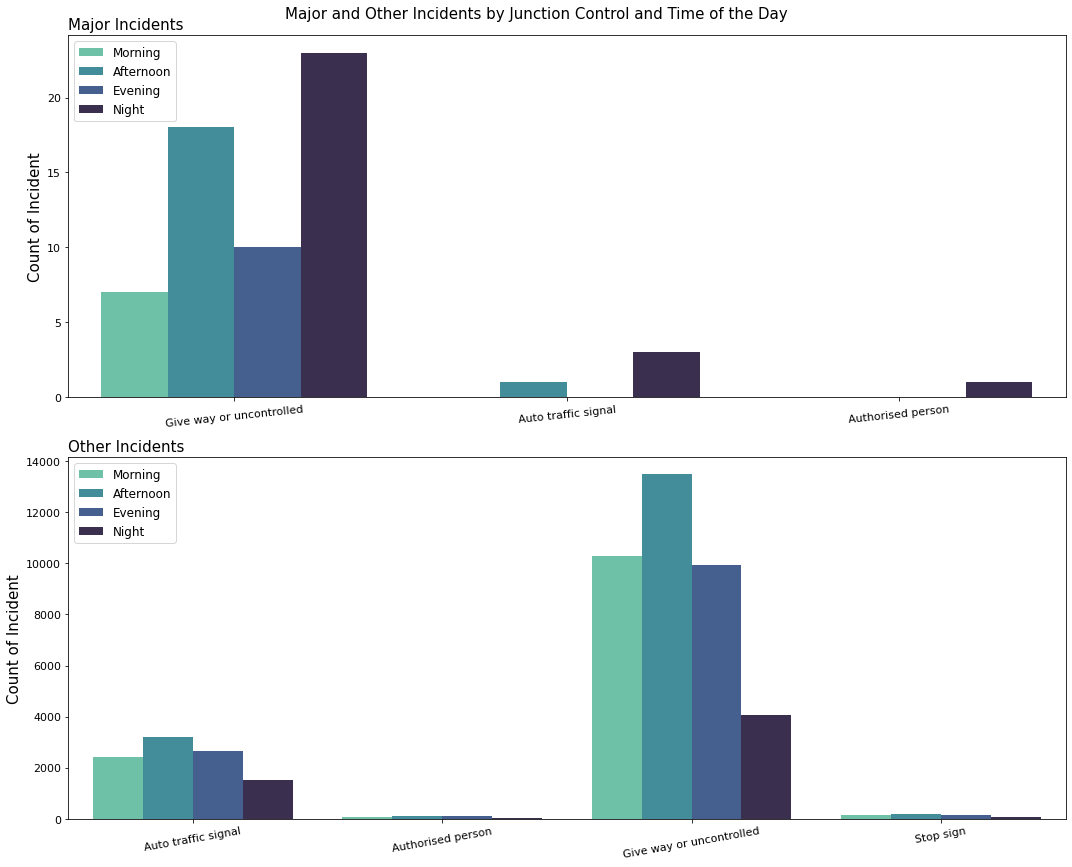

In [53]:
title = "Major and Other Incidents by Junction Control and Time of the Day"
plotLong("junction_control", major_incidents, other_incidents, title, hue2 = 1)

From the above subplots, it can be seen that both major and other incidents had the highest number of incidents in areas that were giveways or uncontrolled. For major incidents, this occurred mostly in the afternoons and at night; for other incidents, this occurred mostly in the mornings, afternoons and evenings. 
<br>
Further analysis of this factor for both rural and urban areas is shown below:

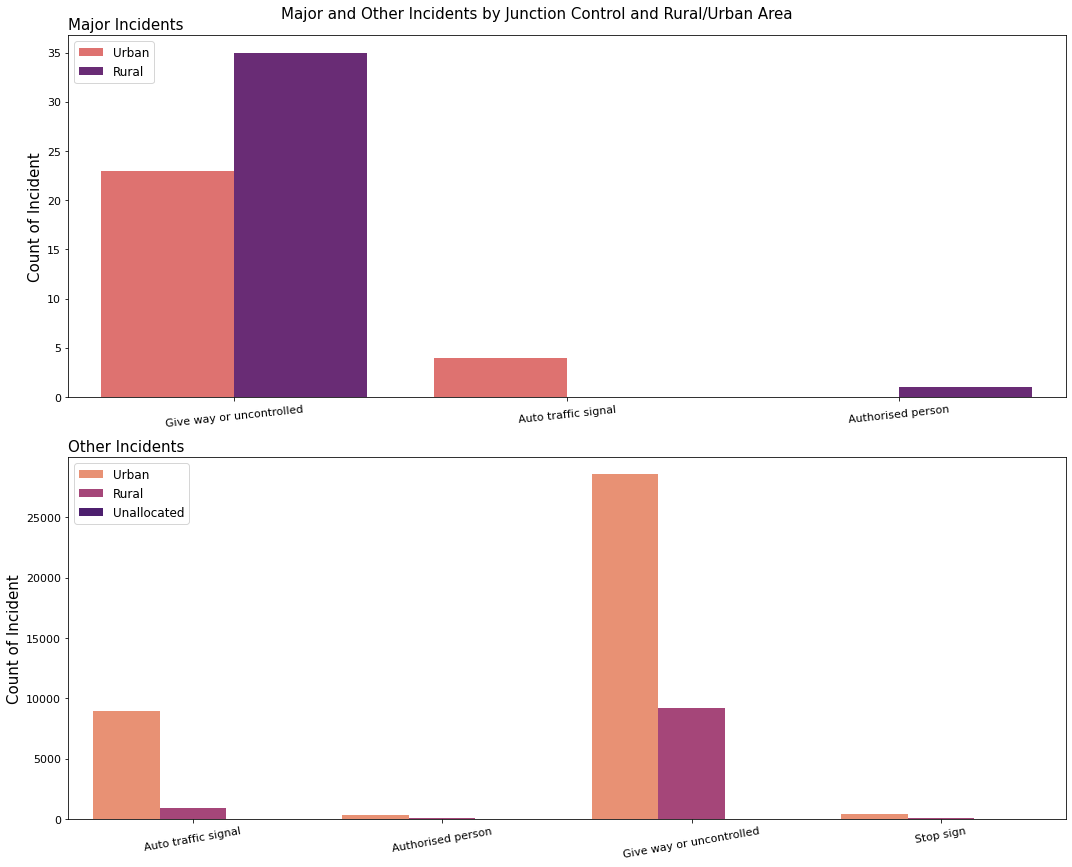

In [54]:
title = "Major and Other Incidents by Junction Control and Rural/Urban Area"
plotLong("junction_control", major_incidents, other_incidents, title, hue1 = 1)

The subplots above show that for each category of junction control involving other incidents, urban areas had the highest number of incidents than rural areas.
<br>
For major incidents, rural areas had the highest number of inicdents in giveways or uncontrolled regions and in regions that were controlled by authorized persons. The figure also shows there were no major incidents in rural areas for places where the junction control was an auto traffic signal. This is also very similar to the number of other incidents for rural areas in these places. This could mean these auto traffic signals are more effective in rural areas; or that these signals are less common in rural areas or a host of other reasons. To get better clarity on this issue more information/data on this feature would be needed.


#### Major and Other Incidents by Speed Limit

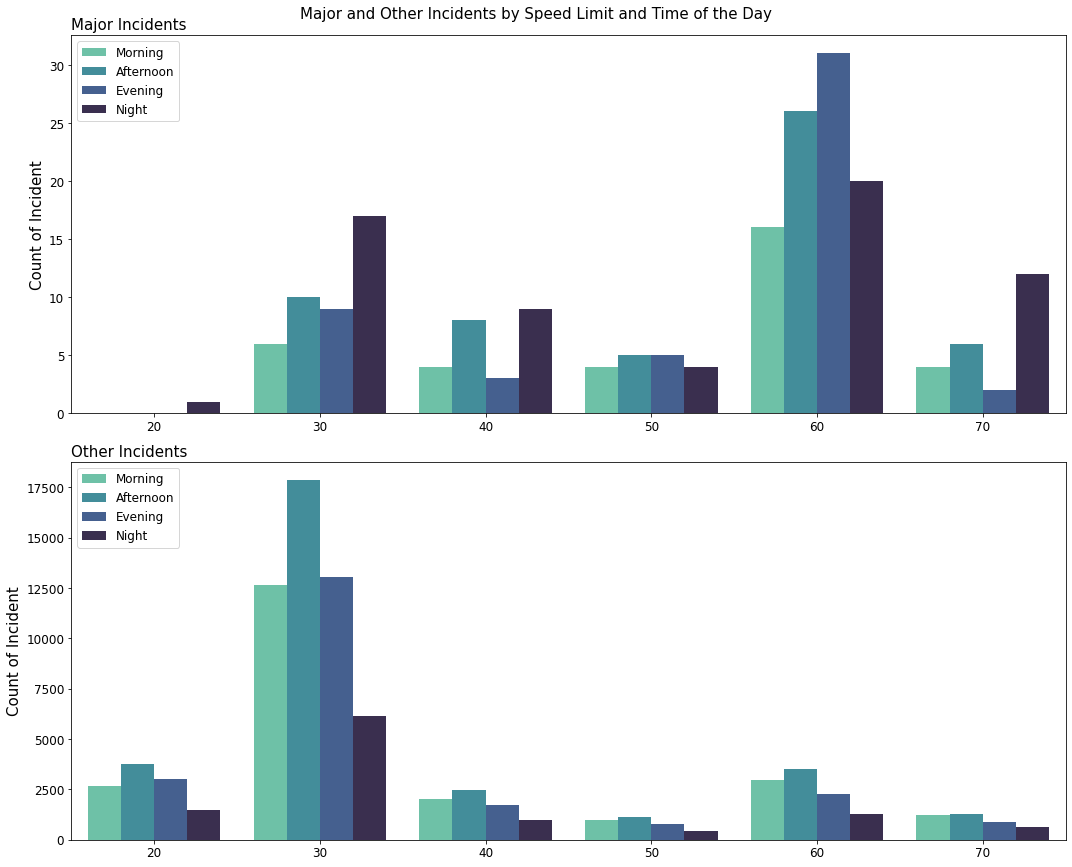

In [55]:
other = other_incidents[other_incidents.speed_limit!=-1]
title = "Major and Other Incidents by Speed Limit and Time of the Day"
create_plot(major_incidents.speed_limit, other.speed_limit, major_incidents, other, title)

The subplots above show that most major incidents occurred on roads with a speed limit of 60 and at all times of the day, with afternoon and evening having significantly higher values. Roads that had a speed limit of 30 had the second highest number of major incidents, with peak values occurring at night. Roads with a speed limit of 70 had most of its major incidents occurring at night.
<br>
For other incidents, the plot shows that roads with a speed limit of 30 had the highest number of major incidents - with peak values occurring in the morning, afternoon and evening.
<br>
Further analysis of this factor in rural and urban areas is shown below

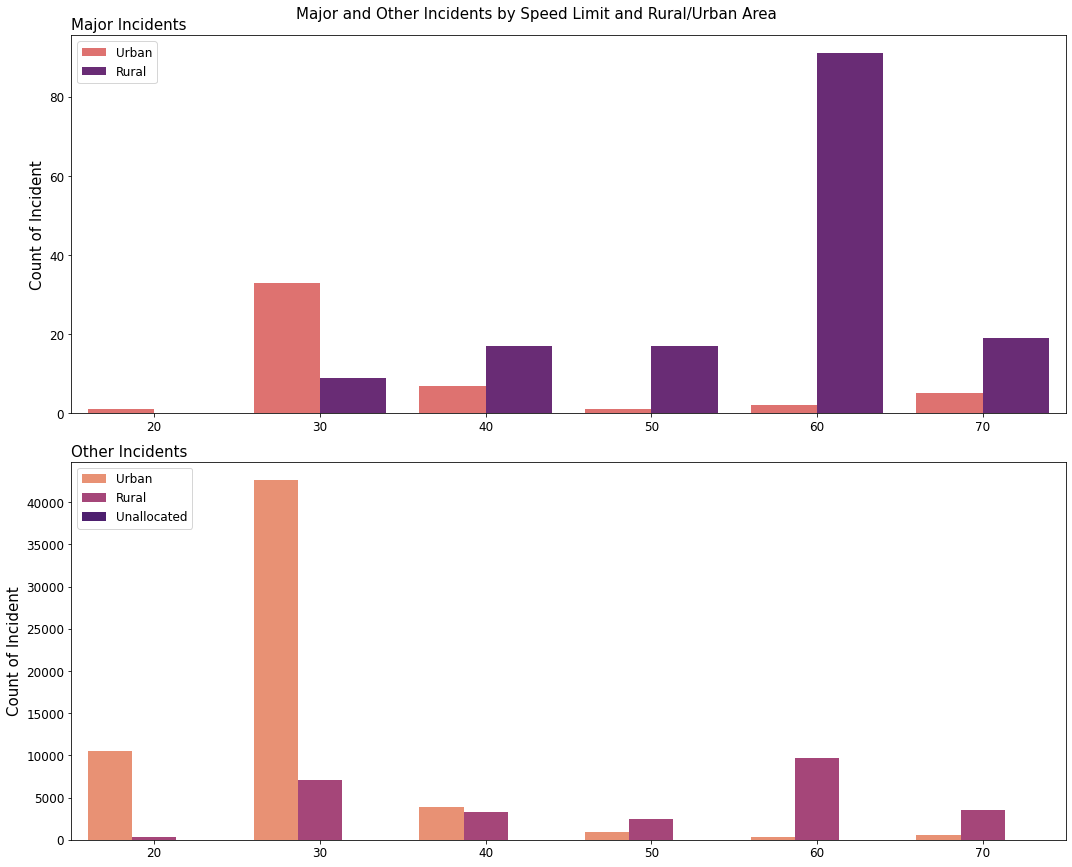

In [56]:
other = other_incidents[other_incidents.speed_limit!=-1]
title = "Major and Other Incidents by Speed Limit and Rural/Urban Area"
create_ruralUrban(major_incidents.speed_limit, other.speed_limit, major_incidents, other, title)

From the subplots above the following conclusions can be drawn:
- Major incidents in rural areas occurred on roads with speed limits of at least 30.
- There were more major incidents in rural areas than in urban areas for speed limits of 40 and above.
- The highest number of major incidents in rural areas occurred on roads that had a speed limit of 60.
- The highest number of other incidents occurred on roads that had a speed limit of 30.
- Rural areas had a higher number of other incidents than urban areas on roads with speed limits of 50,60 and 70.
- The highest number of other incidents in rural areas occurred on roads with a speed limit of 60.
<br>

Since most major and other incidents in rural areas occurred on roads with a speed limit of 60, this could mean that roads with a speed limit of 60 are more accident-prone when compared with other roads. More information/data on this feature would be needed to further evaluate this condition in this factor.


#### Major and Other Incidents by Road Surface Conditions

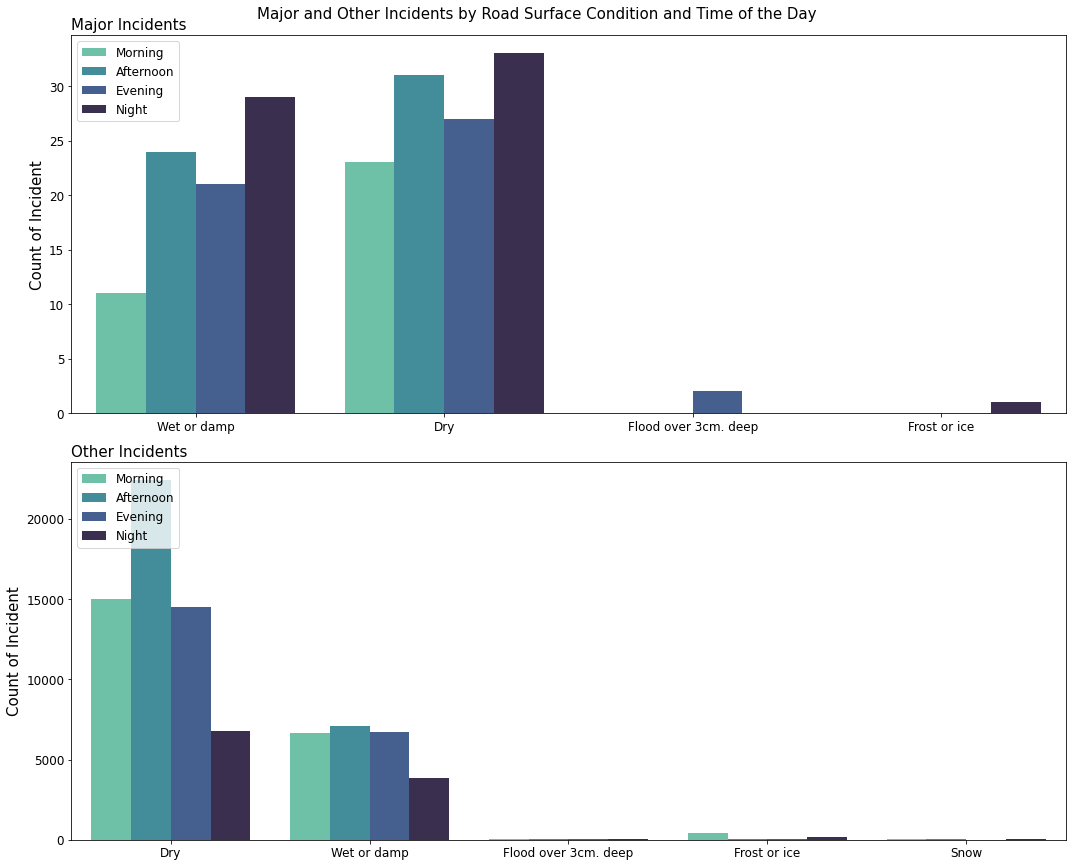

In [57]:
other = other_incidents[(other_incidents.road_surface_conditions!="Data missing or out of range") 
                   & (other_incidents.road_surface_conditions!='unknown (self reported)')]
title = "Major and Other Incidents by Road Surface Condition and Time of the Day"
create_plot(major_incidents.road_surface_conditions, other.road_surface_conditions, major_incidents, other, title)

The subplots above show that most major incidents occurred on dry and wet or damp roads with peak values in the afternoons, evenings and night.
<br>
For other incidents, majority of incidents occurred on dry roads with very high numbers occurring in the afternoon; dry roads also have high number of incidents in the morning and evening. Wet or damp roads have the second highest number of other incidents occurring on them and have relatively the similar numbers in throughout the day.
Further analysis of this factor for rural and urban areas is shown below

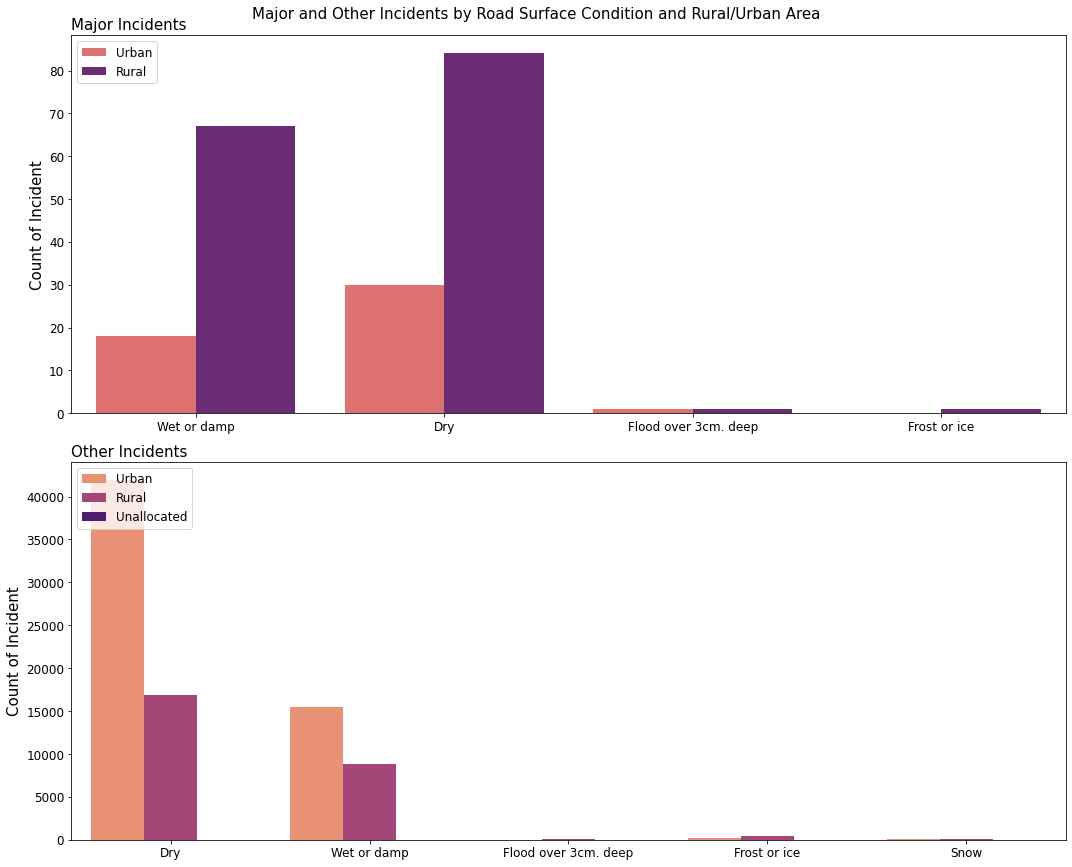

In [58]:
other = other_incidents[(other_incidents.road_surface_conditions!="Data missing or out of range") 
                   & (other_incidents.road_surface_conditions!='unknown (self reported)')]
title = "Major and Other Incidents by Road Surface Condition and Rural/Urban Area"
create_ruralUrban(major_incidents.road_surface_conditions, other.road_surface_conditions, major_incidents, other, title)

The subplots above show that most major and other incidents occur on dry roads and wet or damp roads which is the same information gotten from the previous subplots. This plot however shows that for major incidents most of theses incidents occurred in rural areas. The reverse scenario is true for other incidents.

#### Major and Other Incidents by Special Condition at Site

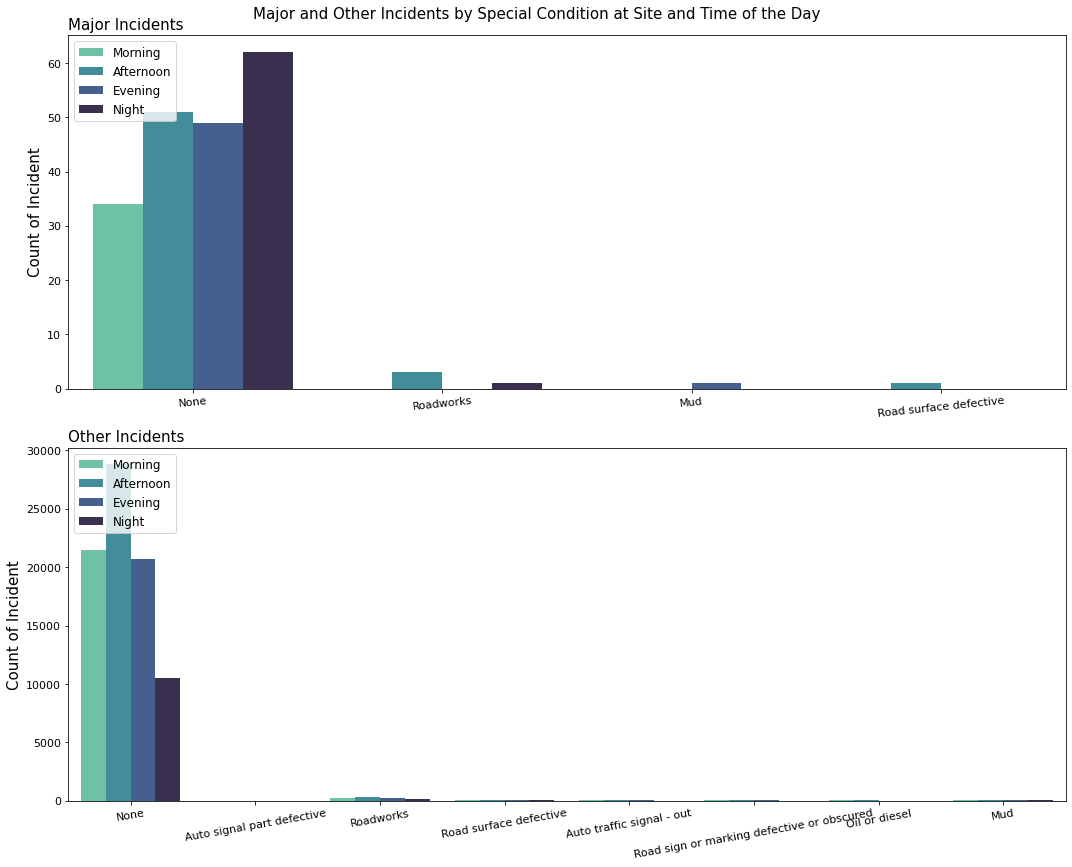

In [59]:
title = "Major and Other Incidents by Special Condition at Site and Time of the Day"
plotLong("special_conditions_at_site",major_incidents, other_incidents, title, hue2=1)

The subplots above show that most incidents - major and other incidents - occurred on roads with no special condition, like roadworks, mud, oil or diesel, auto signal part defectives and so on, at the site of the accident.

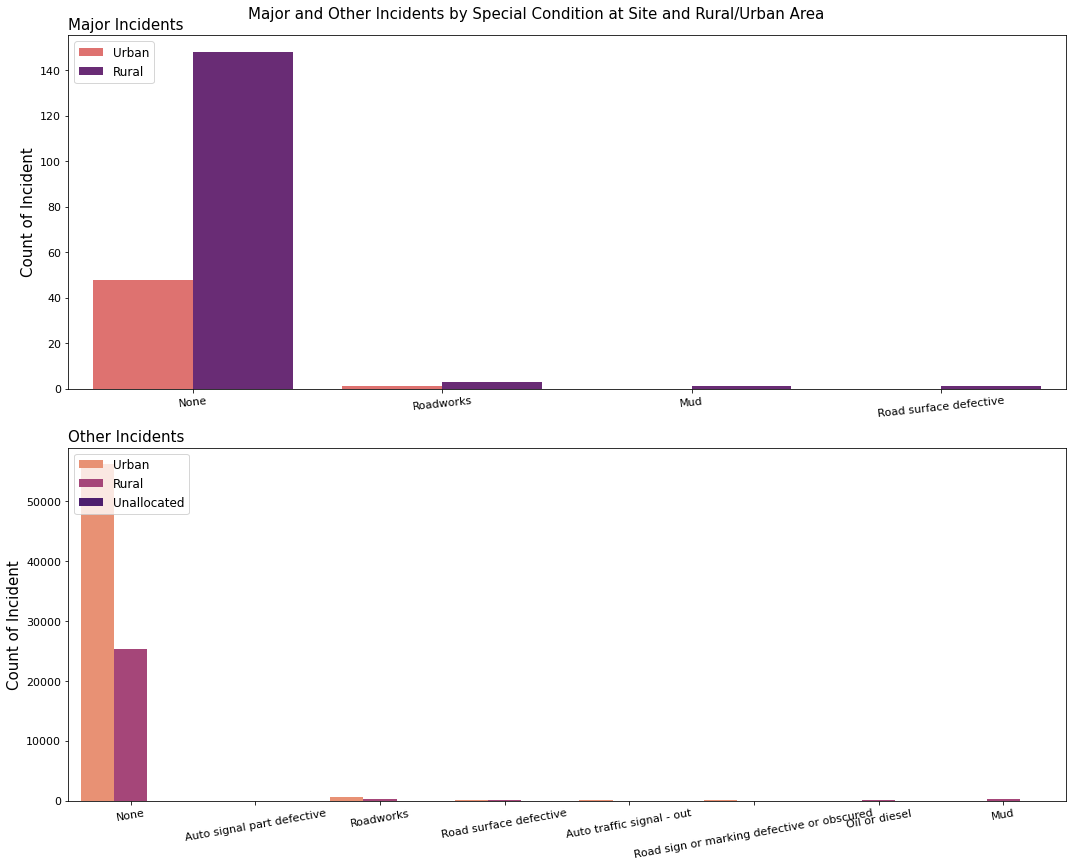

In [60]:
title = "Major and Other Incidents by Special Condition at Site and Rural/Urban Area"
plotLong("special_conditions_at_site", major_incidents, other_incidents, title, hue1=1)

The subplots above reaffirms the findings in the previous subplots with the expection that it hues this plot by rural and urban areas:
- Most major incidents occurred in rural areas with no special conditions at the site of the accident.
- Most other incidents occurred in urban areas with no special conditions at the site of the accident.

#### Major and Other Incidents by Carriageway Hazards

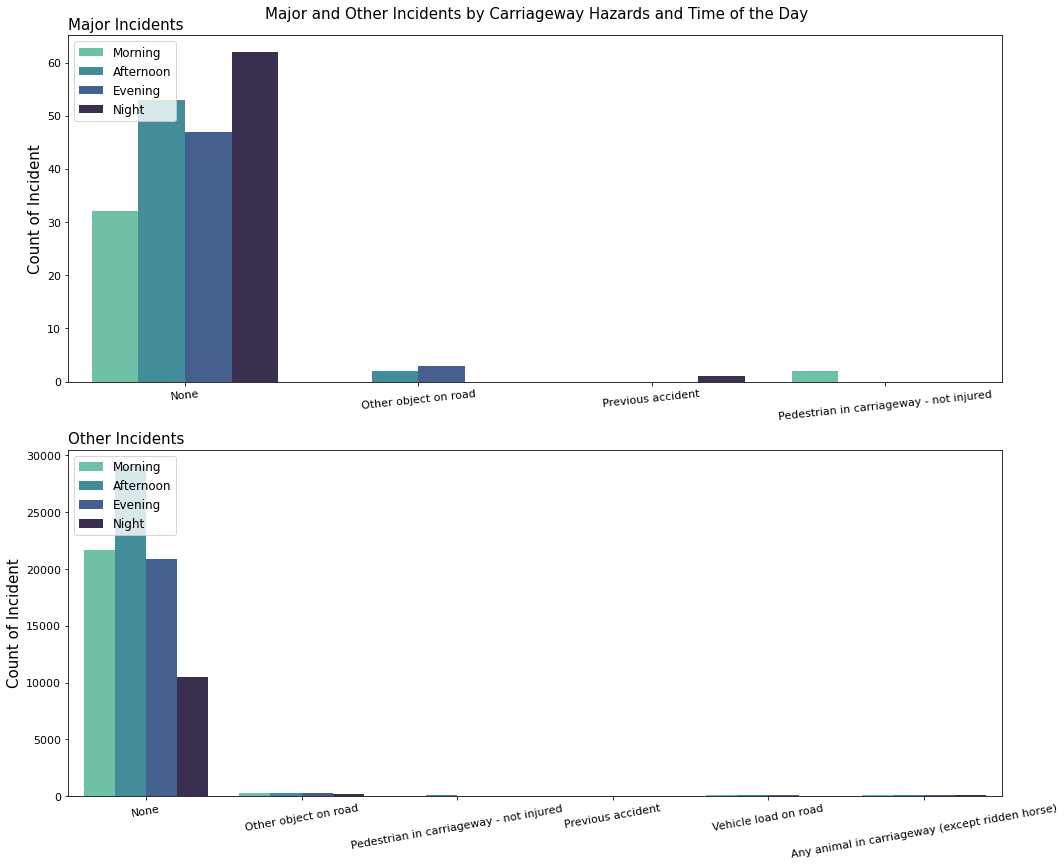

In [61]:
title = "Major and Other Incidents by Carriageway Hazards and Time of the Day"
plotLong("carriageway_hazards", major_incidents, other_incidents, title, hue2=1)

The subplots above shows that a very high majority of accidents - major (96.04%) and other (96.32%) -  occurred in areas with no carriageway hazards

In [62]:
# proportion of major incidents in each category of carriageway hazards
round(major_incidents.carriageway_hazards.value_counts(normalize=True),4)

None                                       0.9604
Other object on road                       0.0248
Pedestrian in carriageway - not injured    0.0099
Previous accident                          0.0050
Name: carriageway_hazards, dtype: float64

In [63]:
# proportion of other incidents in each category of carriageway hazards
round(other_incidents.carriageway_hazards.value_counts(normalize=True),4)

None                                               0.9632
unknown (self reported)                            0.0138
Other object on road                               0.0117
Any animal in carriageway (except ridden horse)    0.0035
Vehicle load on road                               0.0024
Data missing or out of range                       0.0023
Pedestrian in carriageway - not injured            0.0017
Previous accident                                  0.0014
Name: carriageway_hazards, dtype: float64

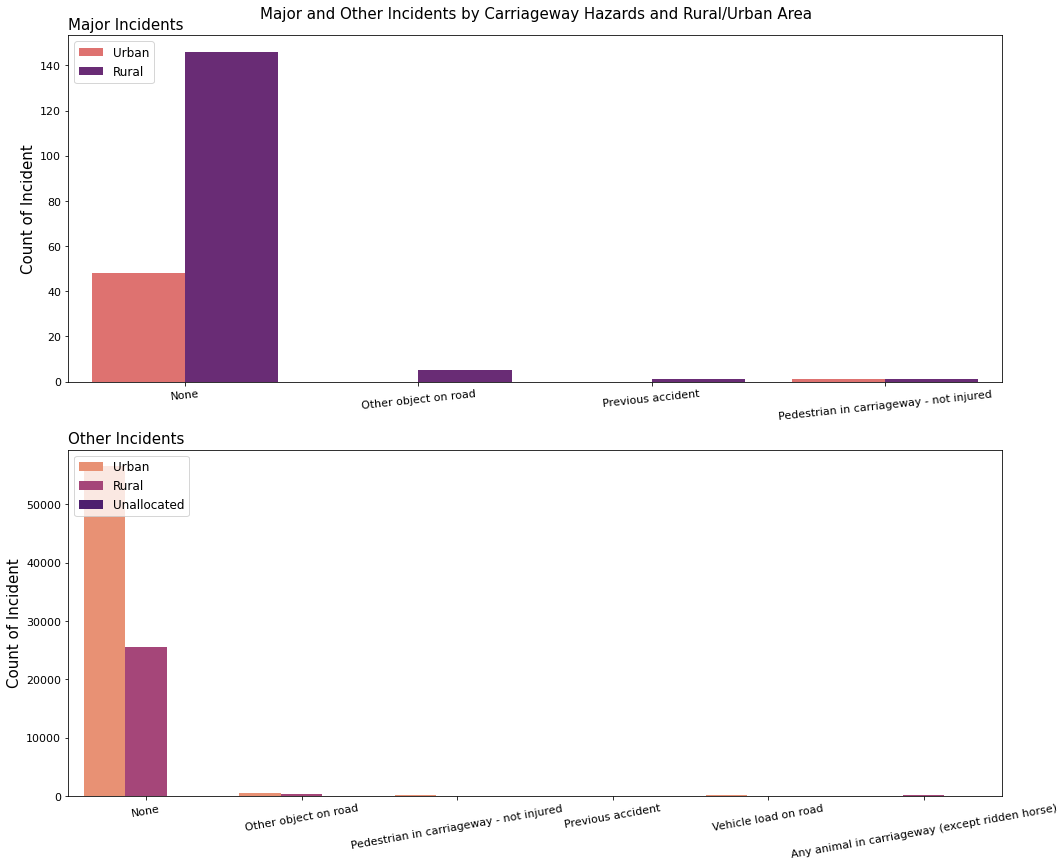

In [64]:
title = "Major and Other Incidents by Carriageway Hazards and Rural/Urban Area"
plotLong("carriageway_hazards", major_incidents, other_incidents, title, hue1=1)

The subplots above reaffirms that most incidents - major and other - occurred on roads with no carriage way hazards both in rural and urban areas. The plot however shows a very small fraction of major incidents occurred in rural areas that had other objects on the road. 

#### Major and Other Incidents by First Road Class

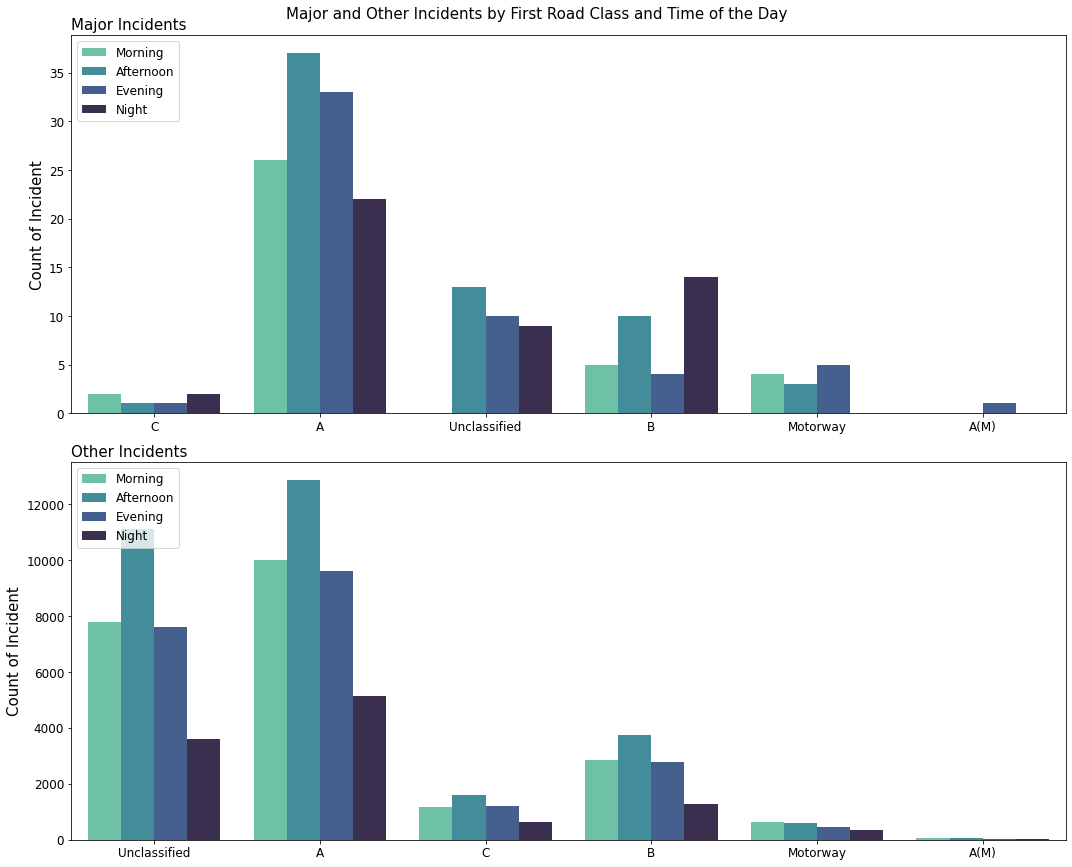

In [65]:
other = other_incidents[(other_incidents.first_road_class!="Data missing or out of range") 
                   & (other_incidents.first_road_class!='unknown (self reported)')]
title = "Major and Other Incidents by First Road Class and Time of the Day"
create_plot(major_incidents.first_road_class, other.first_road_class, other_incidents, other, title)

The subplots above show that first road class A had the highest number of major and other incidents. Next to it is the first road class categorized as B for major incidents, and unclassified roads for other incidents.
<br>
For major incidents, this occurred mostly in the afternoons, evenings and nights, while for other incidents mornings, afternoons and evenings had the majority number of occurrence.
<br>
Further analysis of this factor for rural and urban areas is shown below

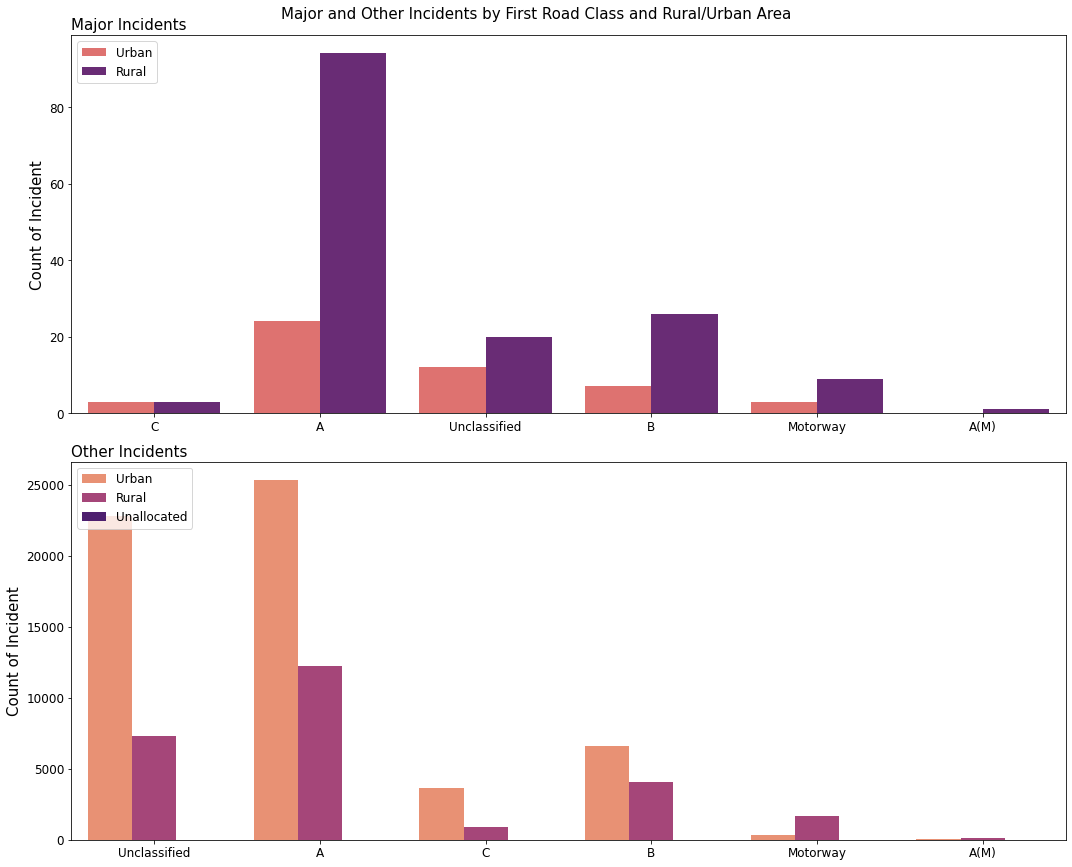

In [66]:
other = other_incidents[(other_incidents.first_road_class!="Data missing or out of range") 
                   & (other_incidents.first_road_class!='unknown (self reported)')]
title = "Major and Other Incidents by First Road Class and Rural/Urban Area"
create_ruralUrban(major_incidents.first_road_class, other.first_road_class, major_incidents, other, title)

From the subplots above, it can be seen that for all first road classes where major incidents occurred, the number of major incidents in rural areas was a lot higher than that of urban areas. The reverse case is true for other incidents excluding motorways where rural areas had a higher numer of other incidents than urban areas.

#### Major and Other Incidents by Second Road Class

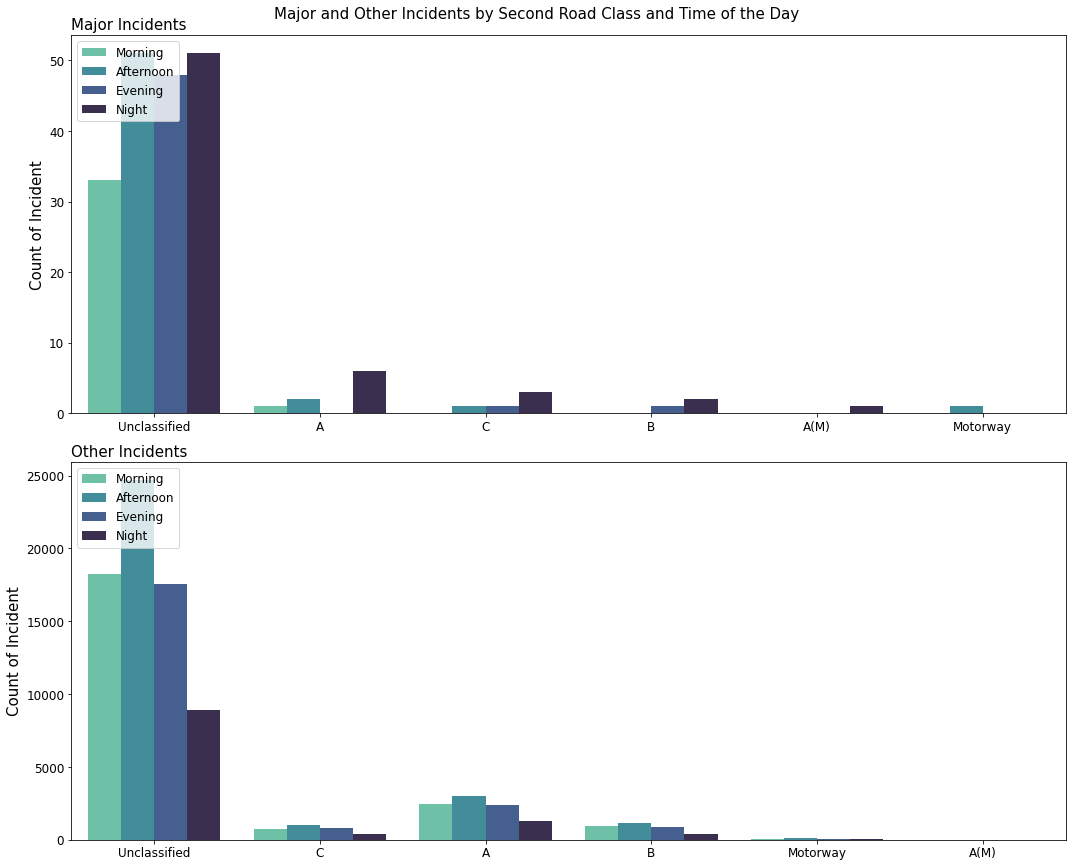

In [67]:
other = other_incidents[(other_incidents.second_road_class!="Data missing or out of range") 
                   & (other_incidents.second_road_class!='unknown (self reported)')]
title = "Major and Other Incidents by Second Road Class and Time of the Day"
create_plot(major_incidents.second_road_class, other.second_road_class, major_incidents, other, title)

The subplots above show that for both major and other incidents, a very high majority of these incidents occurred on roads with their second road class cateogized as "Unclassified". For major incidents, most of these incidents happened during the afternoons, evenings and nights. For other incidents, these accidents happened mostly in the mornings, afternoons and evenings.

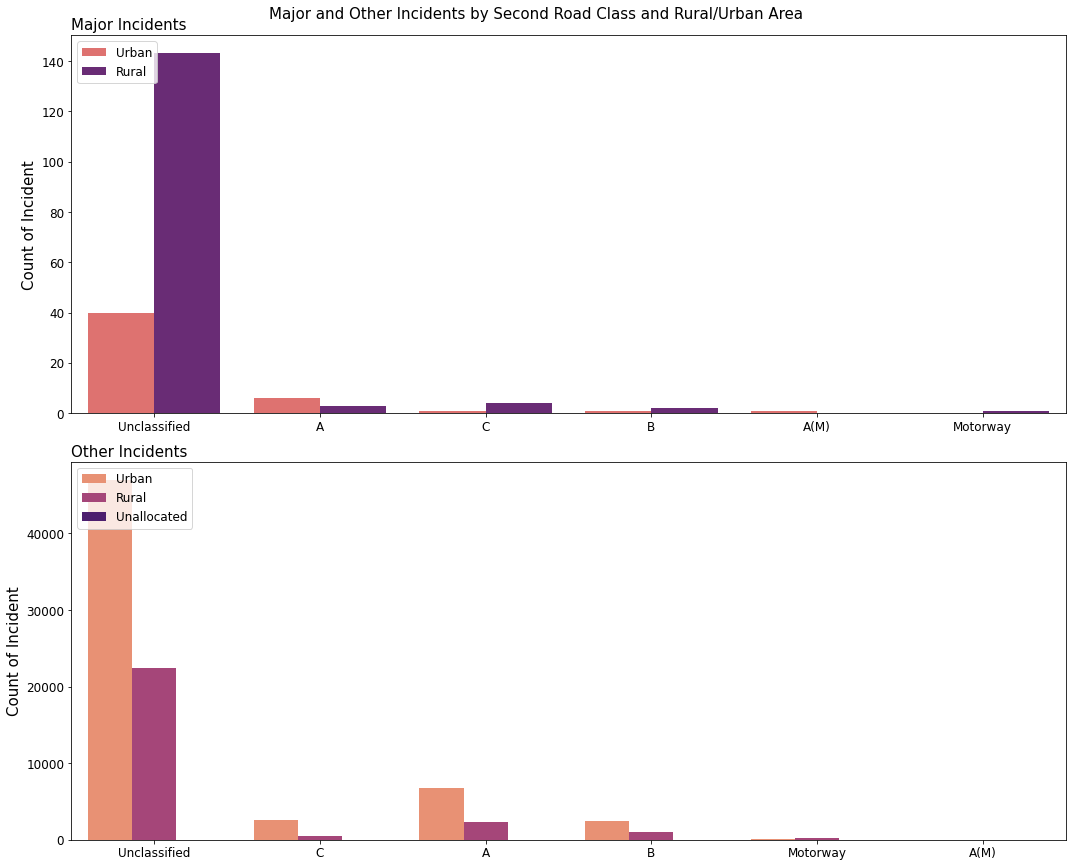

In [68]:
other = other_incidents[(other_incidents.second_road_class!="Data missing or out of range") 
                   & (other_incidents.second_road_class!='unknown (self reported)')]
title = "Major and Other Incidents by Second Road Class and Rural/Urban Area"
create_ruralUrban(major_incidents.second_road_class, other.second_road_class, major_incidents, other, title)

The subplots above show that for both major and minor incidents, majority of the incidents happened on roads with their second road class categorized as unclassified. 
<br>
In correlation with previous plots most of the major incidents happened in rural areas while that of other incidents happened in urban areas.
<br>
Next, the number of vehicles and casualties involved in both major and other incidents is examined.

#### Major and Minor Incidents by Number of Vehicles and Number of Casualties

In [69]:
# code to create a table of the highest casualties for a given rural/urban area and number of vehicles.
maj = major_incidents.groupby(["urban_or_rural_area","number_of_vehicles" ])["number_of_casualties"].sum().reset_index(
).sort_values("number_of_casualties", ascending=False).head().reset_index(drop=True)
maj

urban_or_rural_area  number_of_vehicles  number_of_casualties
0               Rural                   2                   278
1               Rural                   3                   118
2               Rural                   1                    94
3               Urban                   2                    67
4               Rural                   4                    55

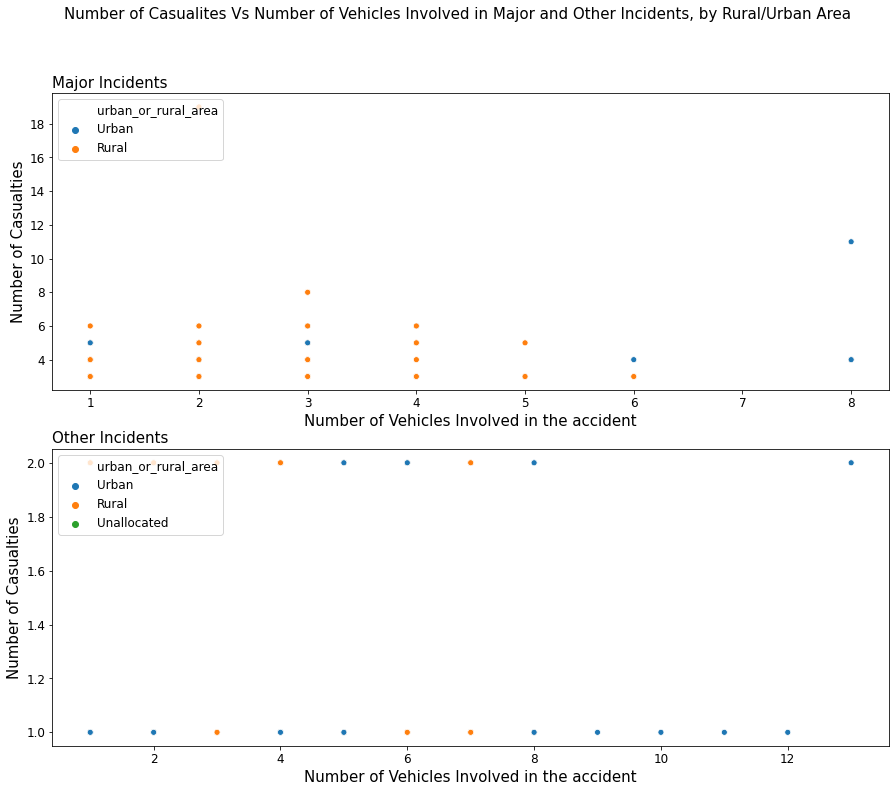

In [70]:
# code to create a scatterplot of the number of vehicles and casualties involved in major and minor incidents.
fig, axes = plt.subplots(2,1)
sns.scatterplot(major_incidents.number_of_vehicles, major_incidents.number_of_casualties, hue = major_incidents.urban_or_rural_area, 
                ax=axes[0])
sns.scatterplot(other_incidents.number_of_vehicles, other_incidents.number_of_casualties, hue = other_incidents.urban_or_rural_area, 
                ax=axes[1])
fig.suptitle("Number of Casualites Vs Number of Vehicles Involved in Major and Other Incidents, by Rural/Urban Area", size=15)
axes[0].set_title("Major Incidents", loc = "left", size=15)
axes[1].set_title("Other Incidents", loc = "left", size=15)
axes[0].set_ylabel("Number of Casualties", fontsize=15)
axes[1].set_ylabel("Number of Casualties", fontsize=15)
axes[0].set_xlabel("Number of Vehicles Involved in the accident", fontsize=15)
axes[1].set_xlabel("Number of Vehicles Involved in the accident", fontsize=15)
axes[0].legend(fontsize=12, loc = "upper left")
axes[1].legend(fontsize=12, loc = "upper left")
axes[0].tick_params(labelsize=12)
axes[1].tick_params(labelsize=12)

### A Closer Look into the Geographical Location of Major Incidents

In [71]:
init_notebook_mode(connected=True)

In [72]:
# importing/reading in a geojson file of UK counties to use for the mapping of counties in the data to polygons on a map
with urlopen("https://opendata.arcgis.com/datasets/b216b4c8a4e74f6fb692a1785255d777_0.geojson") as response:
    counties = json.load(response)


In [73]:
# checking one of the counties represented in the file to know which property holds the county name
counties["features"][0]

{'type': 'Feature',
 'properties': {'objectid': 1,
  'ctyua19cd': 'E06000001',
  'ctyua19nm': 'Hartlepool',
  'ctyua19nmw': ' ',
  'bng_e': 447160,
  'bng_n': 531474,
  'long': -1.27018,
  'lat': 54.67614,
  'st_areashape': 96845510.24630864,
  'st_lengthshape': 50305.32505760145},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-1.240994465138213, 54.72319389763696],
    [-1.25186499193155, 54.719622989845504],
    [-1.270251766857805, 54.72716868778101],
    [-1.305520893631545, 54.7175215633233],
    [-1.301326680312149, 54.708101049993736],
    [-1.319329372918358, 54.691356846957234],
    [-1.344525983747912, 54.69112091272189],
    [-1.330945768339011, 54.68213366184633],
    [-1.34785151195242, 54.662420927214406],
    [-1.341254227615013, 54.650211898646226],
    [-1.380898316323628, 54.64391706835566],
    [-1.335060929000105, 54.63132396805841],
    [-1.328863638821661, 54.644001609293895],
    [-1.316364325364281, 54.64523485245269],
    [-1.299014272981725, 54.62798188

In [74]:
# grouping the data by their counties and count of incidents in each county/city
# changing the name of the county column to match the name of the property in the geojson file
county = major_incidents.groupby("county").size().reset_index()
county.columns = ["ctyua19nm", "number_of_incidents"]

In [ ]:
# creating a geopandas dataframe that joins the two data together. This dataframe was not used for the plotting, but rather 
# to ensure that all counties/cities in the data were matched to the counties in the geojson file.
geo_df = gpd.GeoDataFrame.from_features(counties["features"]).merge(county,on = "ctyua19nm").set_index("ctyua19nm")

In [75]:
# from inspecting the geopandas dataframe the counties/cities below were not properly matched. To rectify this, I manually looked up 
# the corresponding name in the geojson file for each value that was not properly matched.
# Next, I created a dictionay of these values and replaced them in the county dataframe.
ditt = {"City of Bristol": "Bristol, City of",
        "City of Peterborough": "Peterborough",
        "Greater Manchester": "Manchester",
        "London": "City of London",
        "North Northamptonshire": "Northamptonshire",
        "Sir Gaerfyrddin / Carmarthenshire": "Carmarthenshire",
        "Tyne and Wear":"South Tyneside",
        "West Northamptonshire": "Northamptonshire",
        "Ynys Môn / Isle of Anglesey": "Isle of Anglesey"}
dictt = {38: "Kirklees",
         39: "Wakefield",
         40: "Bradford",
         41: "Kirklees",
         42: "Calderdale",
         43: "Leeds",
         44: "Kirklees",
         45: "Leeds",
         46: "Bradford",
         52: "Staffordshire",
         53: "Dudley",
         54: "Sandwell",
         55: "Solihull"}
for i in major_incidents.index:
    if i in dictt.keys():
        major_incidents["county"].loc[i] = dictt[i]
         
major_incidents.county.replace(ditt, inplace=True)
county = major_incidents.groupby("county").size().reset_index()
county.columns = ["ctyua19nm", "number_of_incidents"]

In [76]:
# using plotly to create a chloropleth mapbox that maps the counties to places on the map. The color of each area on the map
# intensifies with increasing number of major incidents in the county.
fig = px.choropleth_mapbox(county, geojson=counties, locations='ctyua19nm', color='number_of_incidents', featureidkey= "properties.ctyua19nm", 
                           color_continuous_scale='viridis_r',
                           range_color=(1, 16),
                            zoom=5,
                           opacity=0.8,
                           hover_name = "ctyua19nm",
                           title = "Number of Major Incidents by County",
                           center = {"lat": 54.6492, "lon":-2.7555},
                           mapbox_style = 'open-street-map',
                           labels={'number_of_incidents':'Number of Incidents', "ctyua19nm": "County"}
                          )
fig.update_geos(fitbounds="locations")
fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, height = 700)
fig.show()

The name and number of incidents in each location can be obtained by hovering over the location on the map above.

Locations with darker colours had higher number of incidents than other locations with lighter colours. The color gets darker with increasing number of incidents.

Below is a table that shows the top 10 locations with the highest number of major incidents

In [77]:
top_10Count = major_incidents.groupby(["county", "urban_or_rural_area"]).size().reset_index().sort_values(by=0, ascending=False).head(12)
top_10Count.columns=["county", "urban_or_rural_area", "number of incidents"]
top_10Count.reset_index(drop=True)

county urban_or_rural_area  number of incidents
0      Lincolnshire               Rural                   15
1              Kent               Rural                    8
2        Manchester               Urban                    8
3   North Yorkshire               Rural                    8
4           Norfolk               Rural                    6
5       Oxfordshire               Rural                    6
6    Cambridgeshire               Rural                    5
7          Cornwall               Rural                    5
8       East Sussex               Rural                    4
9   Buckinghamshire               Rural                    4
10        Hampshire               Rural                    4
11    County Durham               Rural                    4

##### Top 10 locations with the highest number of casualties in major incidents

In [78]:
major_incidents.groupby(["county", "urban_or_rural_area"])["number_of_casualties"].sum().reset_index().sort_values(
    by="number_of_casualties",ascending=False).head(14).reset_index(drop=True)

county urban_or_rural_area  number_of_casualties
0      Lincolnshire               Rural                    56
1        Manchester               Urban                    31
2              Kent               Rural                    30
3   North Yorkshire               Rural                    26
4           Norfolk               Rural                    22
5       Oxfordshire               Rural                    21
6          Cornwall               Rural                    20
7             Angus               Rural                    19
8     County Durham               Rural                    18
9    Cambridgeshire               Rural                    17
10  Buckinghamshire               Rural                    17
11   City of London               Urban                    15
12        Hampshire               Rural                    14
13      East Sussex               Rural                    13

### Major Insights from Analysis

From my analyis of major and other incidents in this report, the following <b>main insights</b> were gained:

 - Most major incidents occurred on Saturdays - evenings and nights, Sundays - afternoons and nights, Thursdays - evenings and nights, and Tuesday afternoons.
 - Most major incidents occurred in Rural areas: approximately 75.74% of major incidents happened in rural areas.
 - Major incidents in rural areas occurred mostly on Saturdays - evenings and nights, Sundays - afternoons and nights, and Thursdays - evenings and nights.
 - Other incidents happended mostly in urban areas: approximately 69% of other incidents happened in urban areas with majority of these incidents occurring in the mornings, afternoons and evenings of weekdays.
 - 99.5% of major incidents occurred in areas where there were no human-controlled pedestrian crossing within 50 meters.
 - Approximately 94.1% of of major incidents occurred in areas where there were no facilities-controlled pedestrian crossing within 50 meters.
 - Compared to Urban areas, Rural areas had less incidents in areas where there were facilities-controlled pedestrian crossing. This could mean less accidents happen in these areas in rural areas or that rural areas do not have much of these facilities. More information would be needed to conclude on it.
 - Approximately 80.69% of major incidents occurred on single carriageways. This number is approximately 73.43% for other incidents; 15.84% of major incidents occurred on dual carriageways while this number is 14.04% for other incidents.
 - Approximately 60% of major incidents occurred in daylight; 22.27% occurred in dark areas where there was no lighting.
 - Approximately 68.81% of major incidents occurred in areas where there were no junctions with 20 meters; 17.33% of major incidents occurred at T or Staggered junctions.
 - ~46.04% of major incidents occurred on roads with 60 as the speed limit. Most of these incidents occurred in rural areas (97.85% of them).
 - ~ 58.42% of major incidents occurred on roads with their first road class categorized as A, 16.34% occurred on B.
 - ~ 90.59% of major incidents occurred on roads with their second road class categorized as "Unclassified".
 - Accidents in rural areas involving 2 vehicles had the highest total number of casualties.
 - Counties with rural areas that had the highest number of major incidents and casualties are:
     - Lincolnshire    - 15 major incidents with 56 total number of casualties from these incidents
     - Kent            - 8 major incidents with 30 total number of casualties from these incidents
     - North Yorkshire - 8 major incidents with 26 total number of casualties from these incidents
     - Norfolk         - 6 major incidents with 22 total number of casualties from these incidents
     - Oxfordshire     - 6 major incidents with 21 total number of casualties from these incidents
     - Cornwall        - 5 major incidents with 20 total number of casualties from these incidents
     - Cambridgeshire  - 5 major incidents with 17 total number of casualties from these incidents
    <br>
- Urban area Machester was the only urban area with a very high number of major incidents and total casualties from these incidents. It had 8 major incidents with 31 total number of casualties from these incidents.

### Recommendations

Based on the insights obtained from this analyis, I make the following recommendations:


Since the current goal of the road safety team is to reduce the number of occurrence of major incidents, and this analysis revealed that a very high number of these major incidents occurred in rural areas in 2020, I would recommed that the road safety team focus their brainstorming efforts on reducing major incidents in rural areas.
<br>
Specifically, I recommend that these strategies should be followed:
 1. Since most major incidents occurred during the weekends and on Thurdays, extra road safety protocols and efforts should be deployed on these days in rural areas.
 2. Since a huge majority of major incidents occurred in areas that had no human-controlled or facilities-controlled pedestrian crossings, I recommend that roads in rural areas that have this property be looked into, and if appropriate, pedestrian crossing facilities should be installed in these areas.
 3. This analysis also revealed that 80.69% of major incidents occurred on single carriageways. This roads should be further scutinized and accident mitigation strategies for these roads should be developed.
 4. Roads in rural areas that do not have appropriate lighting facilities should have these facilities installed.
 5. 68.81% of major incidents occurred in areas that had no junction within 20 meters, extra road safety efforts/strategies should be developed for areas with this property in rural areas.
 6. Extra road safety strategies should be developed for roads with speed limits of 60 in rural areas. These roads had the highest percentage of major incidents among other road speed limits. Rural areas accounted for 97.855 of these roads.
 7. Roads with A or B first road classes should be further analyzed and effective strategies to reduce the number of major incidents on these roads should be developed.
 8. Roads with their second road class categorized as "Unclassified" should be further analyzed.
 
<br>
Even more specifically, I have put together a list of counties/regions with the highest number of major incidents and casualties as well as their properties for each main insights found in this analysis. I recommend that the road safety team begin their brainstorming efforts by studying these regions to learn a lot more about them and potentially find regions with similar properties in the UK. This would help them develop prevention strategies for not only these regions, but also regions that have similar properties to these regions.

In addition, the Urban Area "Manchester" was the only Urban area with a very high number of major incidents and casualties. To this end, I have also included this region alongside other rural areas.

In [79]:
def print_properties(location):
    """
    This function takes in the name of a location and prints out properties of interest for that location.
    Properties of interest are the road_type major incidents occurred and other properties highlighted in the analysis 
    carried out in this report.
    location: str
    """
    print("        ", colored(location.upper(), attrs=["bold"]))
    print(colored("    ROAD TYPE", attrs=["bold"]))
    print(major_incidents[major_incidents.county==location].road_type.value_counts(normalize=True).to_string())
    print(colored("   HUMAN-CONTROLLED PEDESTRIAN CROSSING", attrs=["bold"]))
    print(major_incidents[major_incidents.county==location].pedestrian_crossing_human_control.value_counts(normalize=True).to_string())
    print(colored("   FACILITIES-CONTROLLED PEDESTRIAN CROSSING", attrs=["bold"]))
    print(major_incidents[major_incidents.county==location].pedestrian_crossing_physical_facilities.value_counts(
        normalize=True).to_string())
    print(colored("   LIGHT CONDITIONS", attrs=["bold"]))
    print(major_incidents[major_incidents.county==location].light_conditions.value_counts(normalize=True).to_string())
    print(colored("   JUNCTION TYPE", attrs=["bold"]))
    print(major_incidents[major_incidents.county==location].junction_detail.value_counts(normalize=True).to_string())
    print(colored("   FIRST ROAD CLASS", attrs=["bold"]))
    print(major_incidents[major_incidents.county==location].first_road_class.value_counts(normalize=True).to_string())
    print(colored("  SECOND ROAD CLASS", attrs=["bold"]))
    print(major_incidents[major_incidents.county==location].second_road_class.value_counts(normalize=True).to_string())
    print("\n")

#### Top 7 Rural Areas - plus Manchester - with the Highest Number of Major Incidents and Casualties

In [80]:
locations = ["Lincolnshire", "Kent", "North Yorkshire", "Norfolk", "Oxfordshire", "Cornwall", "Cambridgeshire", "Manchester"]
for i in locations:
    print_properties(i)

         LINCOLNSHIRE
    ROAD TYPE
Single carriageway    0.866667
Dual carriageway      0.133333
   HUMAN-CONTROLLED PEDESTRIAN CROSSING
None within 50 metres     1.0
   FACILITIES-CONTROLLED PEDESTRIAN CROSSING
No physical crossing facilities within 50 metres    1.0
   LIGHT CONDITIONS
Daylight                  0.6
Darkness - no lighting    0.4
   JUNCTION TYPE
Not at junction or within 20 metres    0.666667
T or staggered junction                0.333333
   FIRST ROAD CLASS
A               0.800000
B               0.133333
Unclassified    0.066667
  SECOND ROAD CLASS
Unclassified    0.933333
C               0.066667


         KENT
    ROAD TYPE
Single carriageway    0.555556
Dual carriageway      0.444444
   HUMAN-CONTROLLED PEDESTRIAN CROSSING
None within 50 metres     1.0
   FACILITIES-CONTROLLED PEDESTRIAN CROSSING
No physical crossing facilities within 50 metres    1.0
   LIGHT CONDITIONS
Daylight                  0.777778
Darkness - lights lit     0.111111
Darkness - no lighti

##### References
 1. Brake "the road safety charity", "UK Road Death and Casualty Statisitics" https://www.brake.org.uk/get-involved/take-action/mybrake/knowledge-centre/uk-road-safety
 2. ROSPA, "accidents don't have to happen" https://www.rospa.com/road-safety